In [3]:
import numpy as np
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt

cosmosis="/home/cz136/project/technical/cosmosis/"
plots=cosmosis+"plots/"
output=cosmosis+"output/"
demos=cosmosis+"demos/"
lcdm="$\Lambda$CDM"

In [4]:
def iter_plots(path):
    for imageName in glob.glob(path): #assuming JPG
        display(Image(filename=imageName))
        yield imageName

# CosmoSIS Report 

## Demos

### demo1

demo1.int input the standard cosmology values in value1.ini to CAMB code and output power spectra in CMB, cosmological parameters, distances as functions of redshift, and linear power spectrum. Then Halofit read the parameters and the output from CAMB to calculate non-linear matter power spectrum.

In [5]:
value1=demos+"values1.ini"

In [6]:
demo1=iter_plots(plots+"demo1*.png")

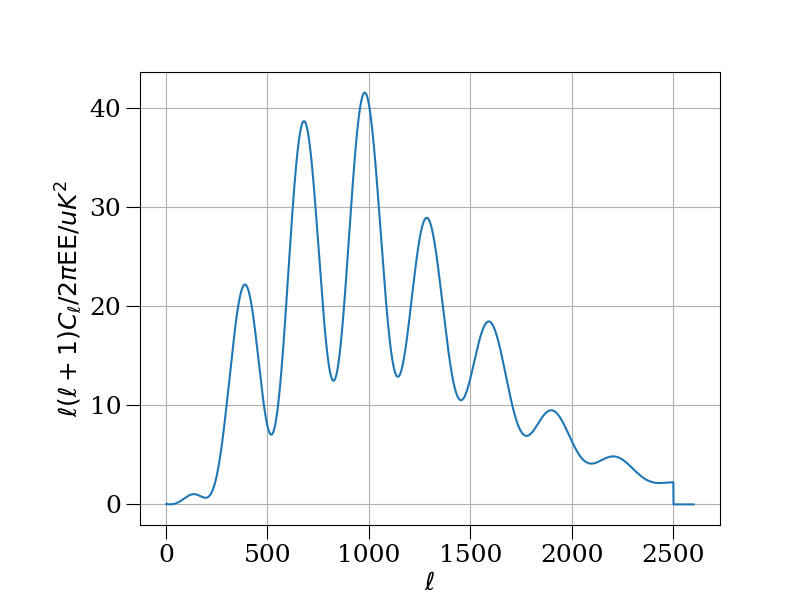

'/home/cz136/project/technical/cosmosis/plots/demo1_ee.png'

In [7]:
next(demo1)

This is E-mode CMB polarization power spectrum.

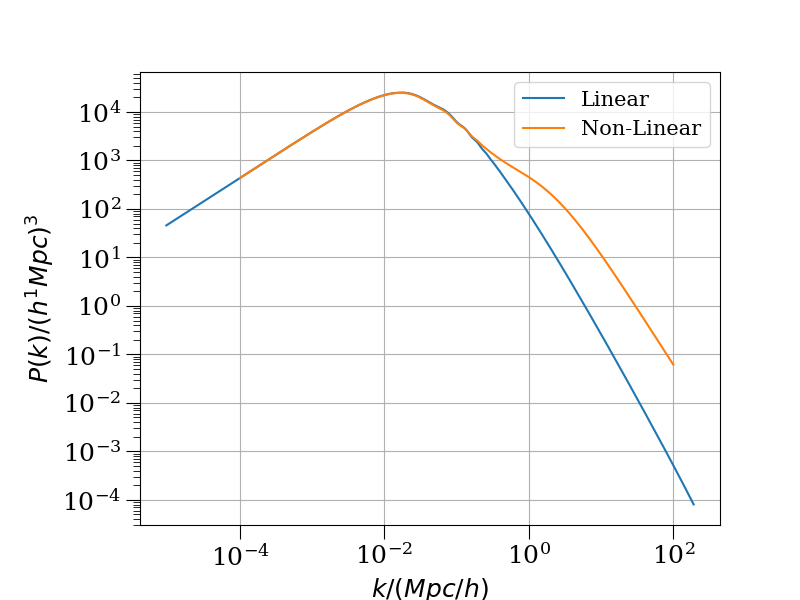

'/home/cz136/project/technical/cosmosis/plots/demo1_matter_power.png'

In [8]:
next(demo1)

This is the linear and non-linear matter power spectrum calculated from the parameters. The linear one is calculated from CAMB and the non-linear one is calculated from Halofit.

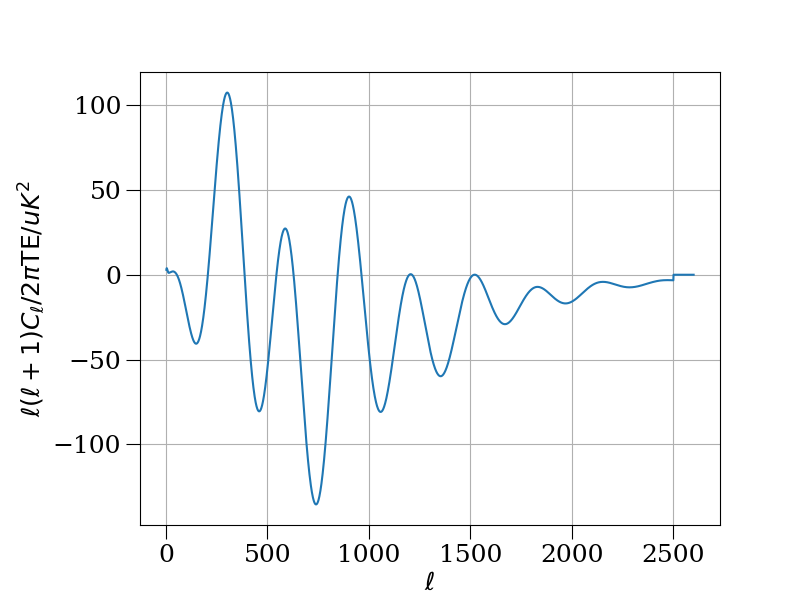

'/home/cz136/project/technical/cosmosis/plots/demo1_te.png'

In [9]:
next(demo1)

This is the temperature-E-mode cross-correlation power spectrum of CMB.

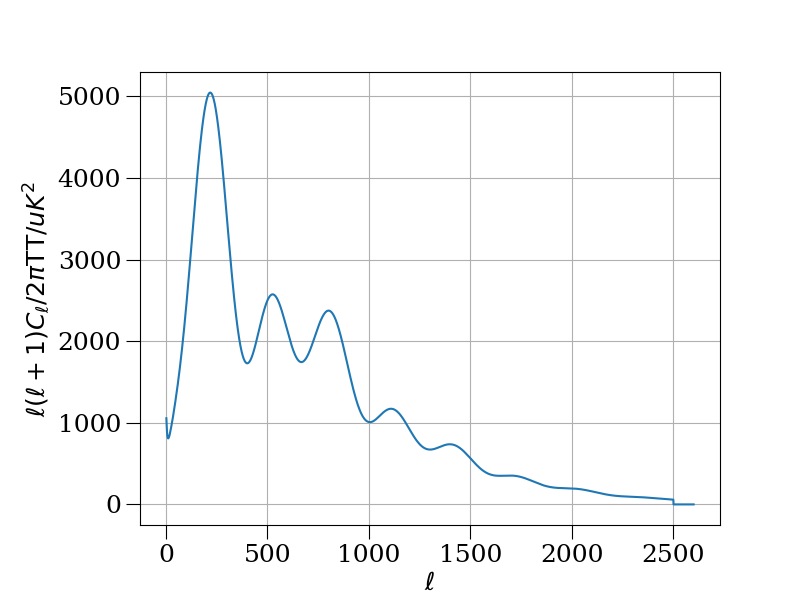

'/home/cz136/project/technical/cosmosis/plots/demo1_tt.png'

In [10]:
next(demo1)

This is the CMB temperature power spectrum we talked about in class.

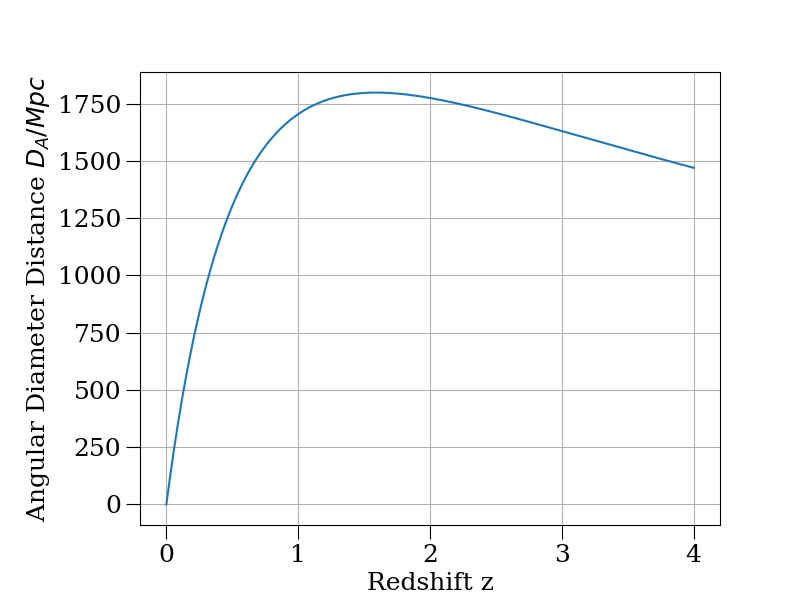

'/home/cz136/project/technical/cosmosis/plots/demo1_angular_distance.png'

In [11]:
next(demo1)

This is the angular diameter distance in standard cosmology. 

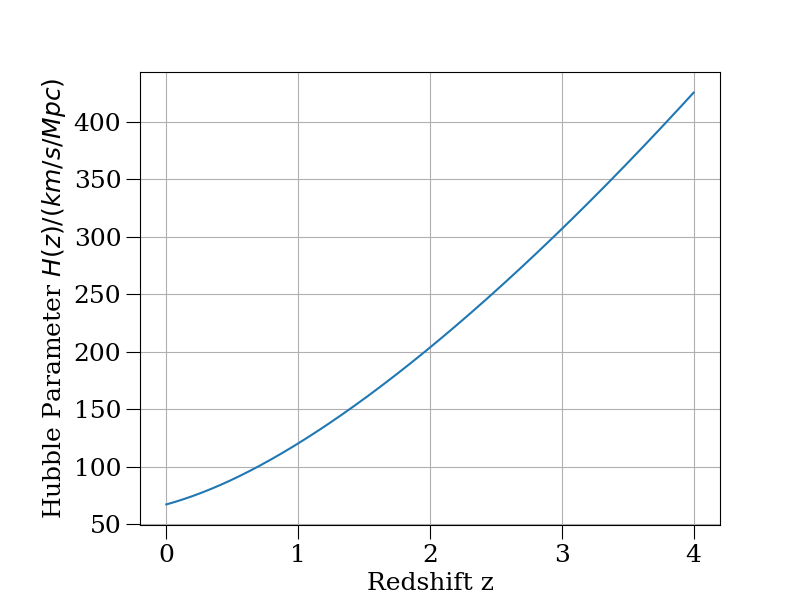

'/home/cz136/project/technical/cosmosis/plots/demo1_hubble.png'

In [12]:
next(demo1)

Hubble parameter as a function of redshift

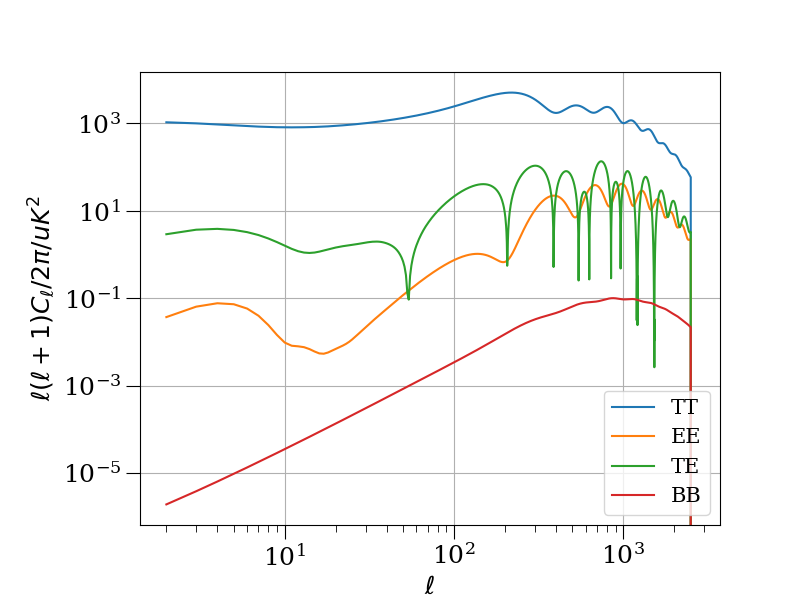

'/home/cz136/project/technical/cosmosis/plots/demo1_grand.png'

In [13]:
next(demo1)

CMB power spectra.

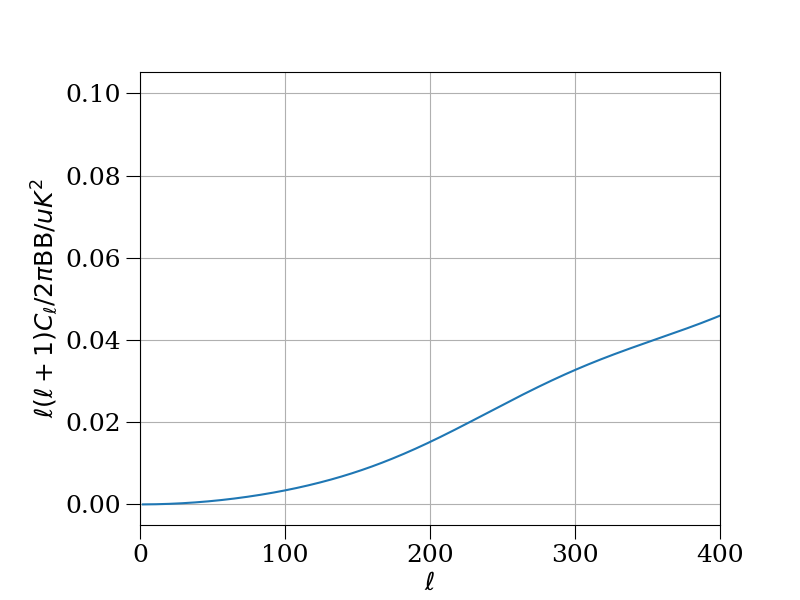

'/home/cz136/project/technical/cosmosis/plots/demo1_bb.png'

In [14]:
next(demo1)

CMB B-mode auto-correlation.

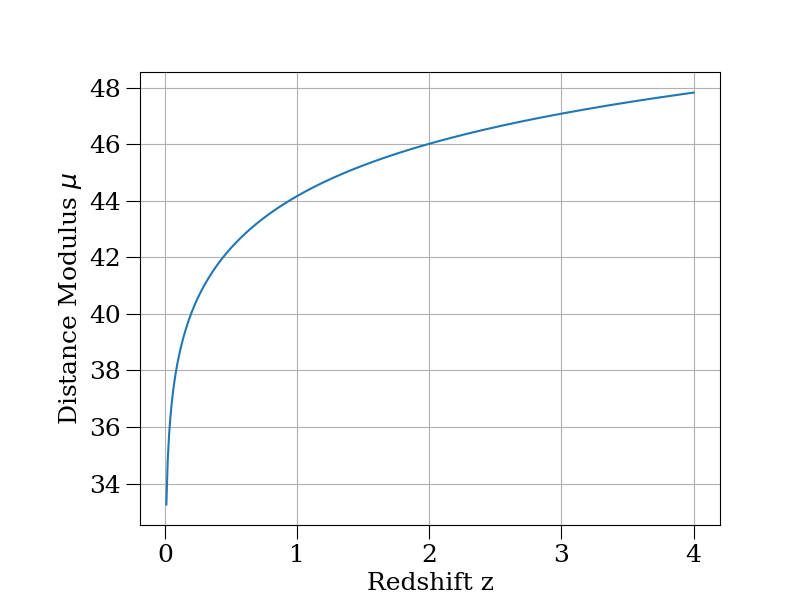

'/home/cz136/project/technical/cosmosis/plots/demo1_distance_modulus.png'

In [15]:
next(demo1)

Distance modulus $m-M$ as a function fo redshift

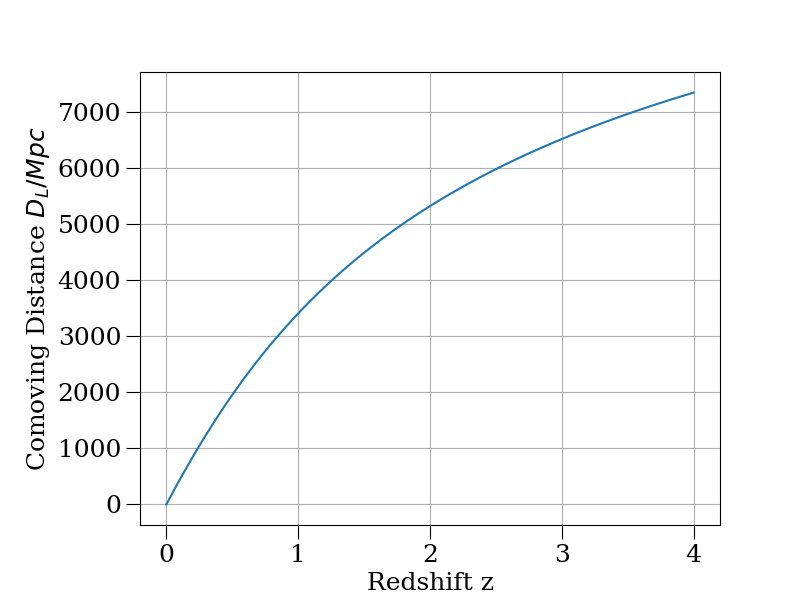

'/home/cz136/project/technical/cosmosis/plots/demo1_comoving_distance.png'

In [16]:
next(demo1)

The comoving radial distance from us to objects at redshift $z$

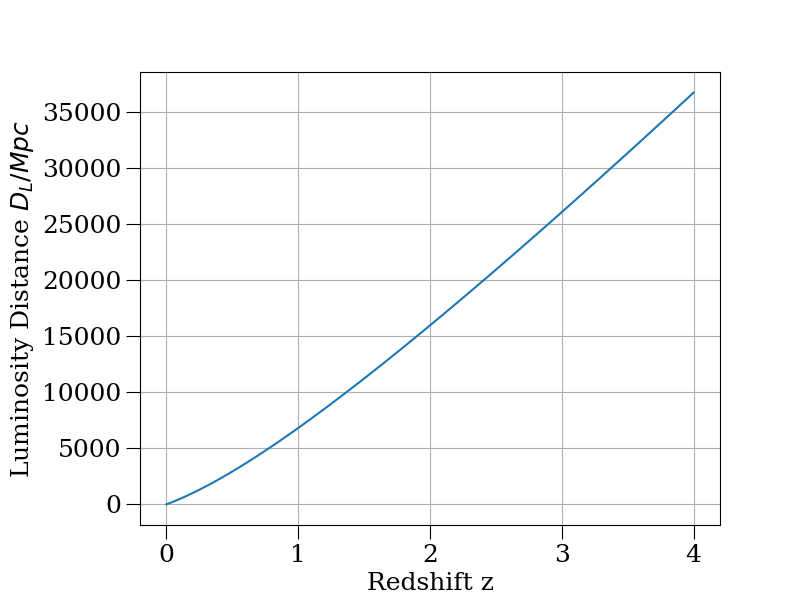

'/home/cz136/project/technical/cosmosis/plots/demo1_luminosity_distance.png'

In [17]:
next(demo1)

Lumiosity distance from us to a standard candle at redshift $z$

## demo2

demo2 does basically the same thing as demo1 but with parameters about neutrino and tensor perturbations and without Halofit. In addition, it compares the result of the simulation with Planck and BICEP data and yields likelihood values.

```
bicep_like = -3.2713736364823296  
planck2015_like = -1726.9467265163364
```

## demo3

demo3 expand the parameter space of $r_T$ to the interval $[0,0.5]$, and then CosmoSIS calcualte the likelihood of the parameter and put constraints on the parameter with BICEP data.

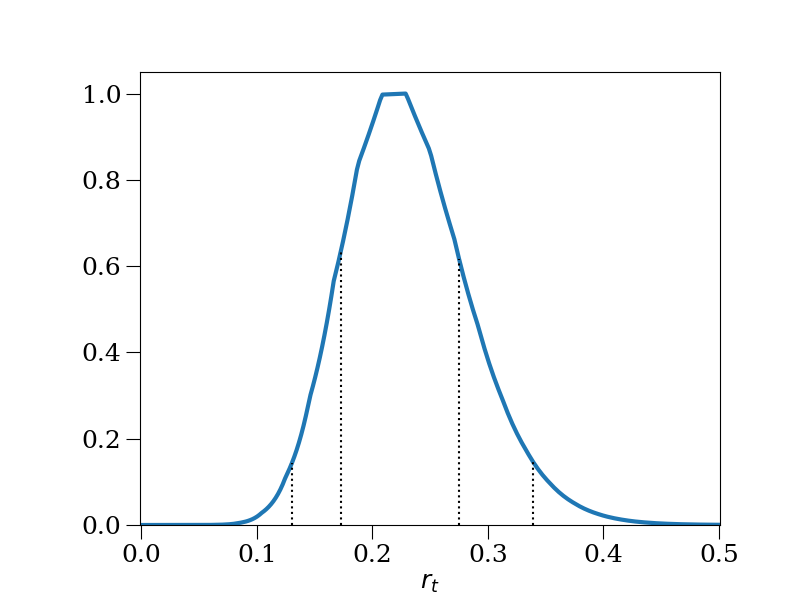

In [18]:
display(Image(filename=plots+"demo3_cosmological_parameters--r_t.png"))

One additional plot generated by demo3 is the relative likihood of the parameter given BICEP data.

The statistics of the parameter are:

```
Marginalized mean, std-dev:
    cosmological_parameters--r_t = 0.231287 ± 0.0544917

Marginalized median, std-dev:
    cosmological_parameters--r_t = 0.216831 ± 0.0544917

Best likelihood:
    cosmological_parameters--r_t = 0.229167
    prior = 0.693147
    post = -2.85609
```

## demo4

demo4 does similar things as demo3 but with 5 parameter and a different sampler, maxlike. The most likely values for `cosmological_parameters--omega_m   cosmological_parameters--h0 cosmological_parameters--omega_b    cosmological_parameters--a_s    cosmological_parameters--n_s` are 

`0.14161103899324978   0.02225223756479768   0.6800918515177078   0.9651390758410499   2.2027452026774598e-09`

## demo5

demo5 uses Markov chain Monte Carlo analysis to estimate the likelyhood of cosmology and supernova light curve to distance parameters. The data we are using are from SDSS-II/SNLS3. The samples are saved in demo5.txt.

With postprocess, we get histogram plots as shown below:

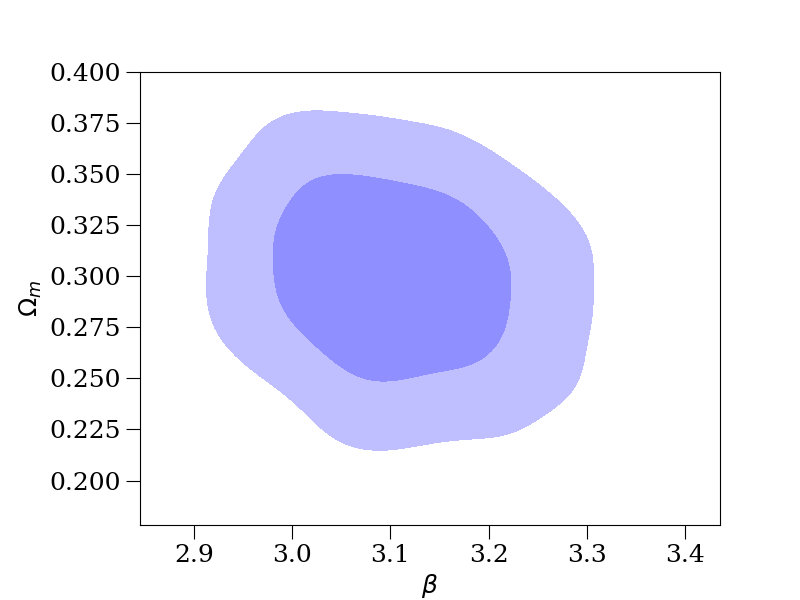

In [19]:
display(Image(filename=plots+"demo5_2D_supernova_params--beta_cosmological_parameters--omega_m.png"))

The contours are 68% and 95% likelihood.

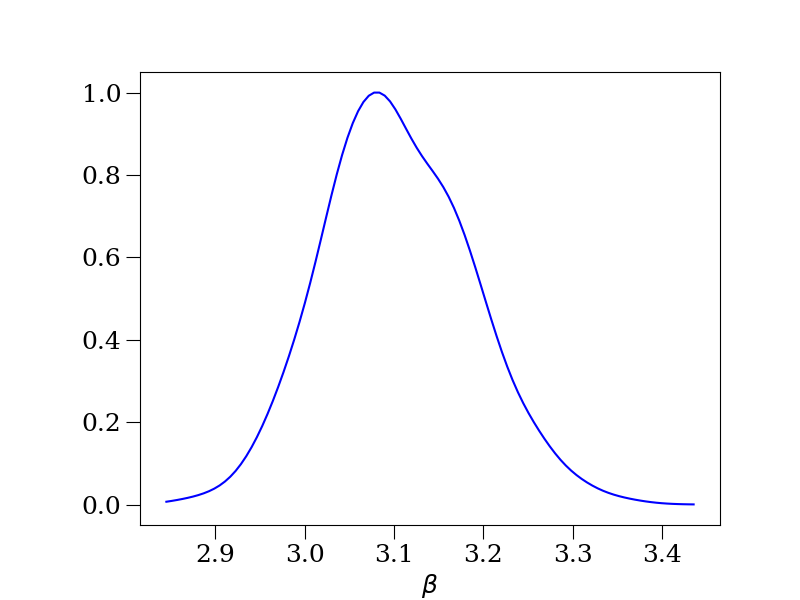

In [20]:
display(Image(filename=plots+"demo5_supernova_params--beta.png"))

## demo7

demo7 uses grid to generate a grid of parameters and then calculate the likelihood of each point on the grid. The axes of the grid are $\sigma_8$ and $\Omega_m$. And the output plot looks like this

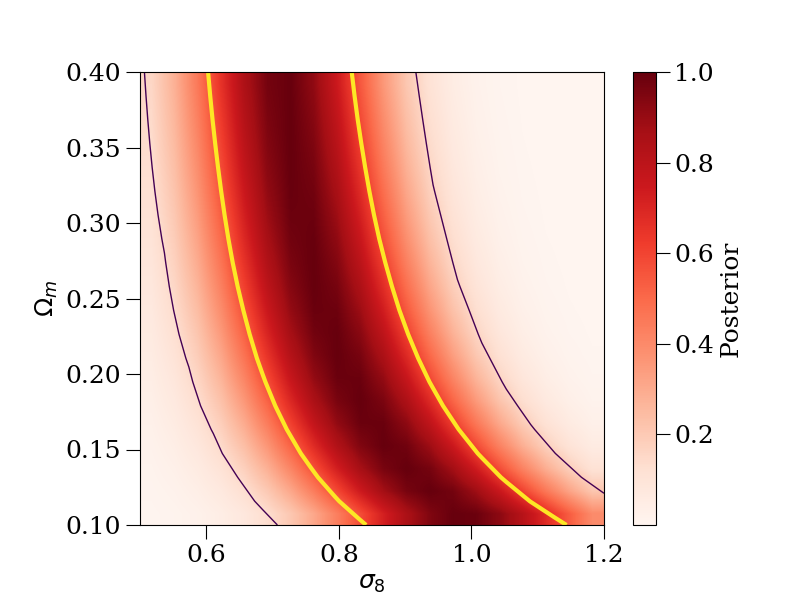

In [21]:
display(Image(filename=plots+"demo7_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png"))

```
Marginalized mean, std-dev:
    cosmological_parameters--omega_m = 0.241955 ± 0.0915885
    cosmological_parameters--sigma_8 = 0.802542 ± 0.141301

Marginalized median, std-dev:
    cosmological_parameters--omega_m = 0.229923 ± 0.0915885
    cosmological_parameters--sigma_8 = 0.774403 ± 0.141301

Best likelihood:
    cosmological_parameters--omega_m = 0.178947
    cosmological_parameters--sigma_8 = 0.831579
    prior = 1.56065
    post = 3.35978
```

# Baryon only universe

I tried to follow Valentino et al. 2019 and set all parameters in accordance with Planck18 but with $\Omega_k =-0.0438$ but cosmosis won't take negative $\Omega_k$ for some reason. So I set the baryon density today to be $\Omega_b=0.3140$. 

In [22]:
output=cosmosis+"output/alt/"
output1=cosmosis+"output/demo1/"

distance_dir=output+"distances/"
distance_dir1=output1+"distances/"

name_dict={"d_l":"Luminosity Distance $D_L / Mpc$","d_a":"Angular Diameter Distance $D_A / Mpc$","d_m":"Comoving Distance $D_L / Mpc$",
          "mu":"Distance Modulus $\\mu$","z":"Redshift z","h":"Hubble Parameter $H(z) / (km/s/Mpc)$"}

Text(0, 0.5, 'Angular Diameter Distance $D_A / Mpc$')

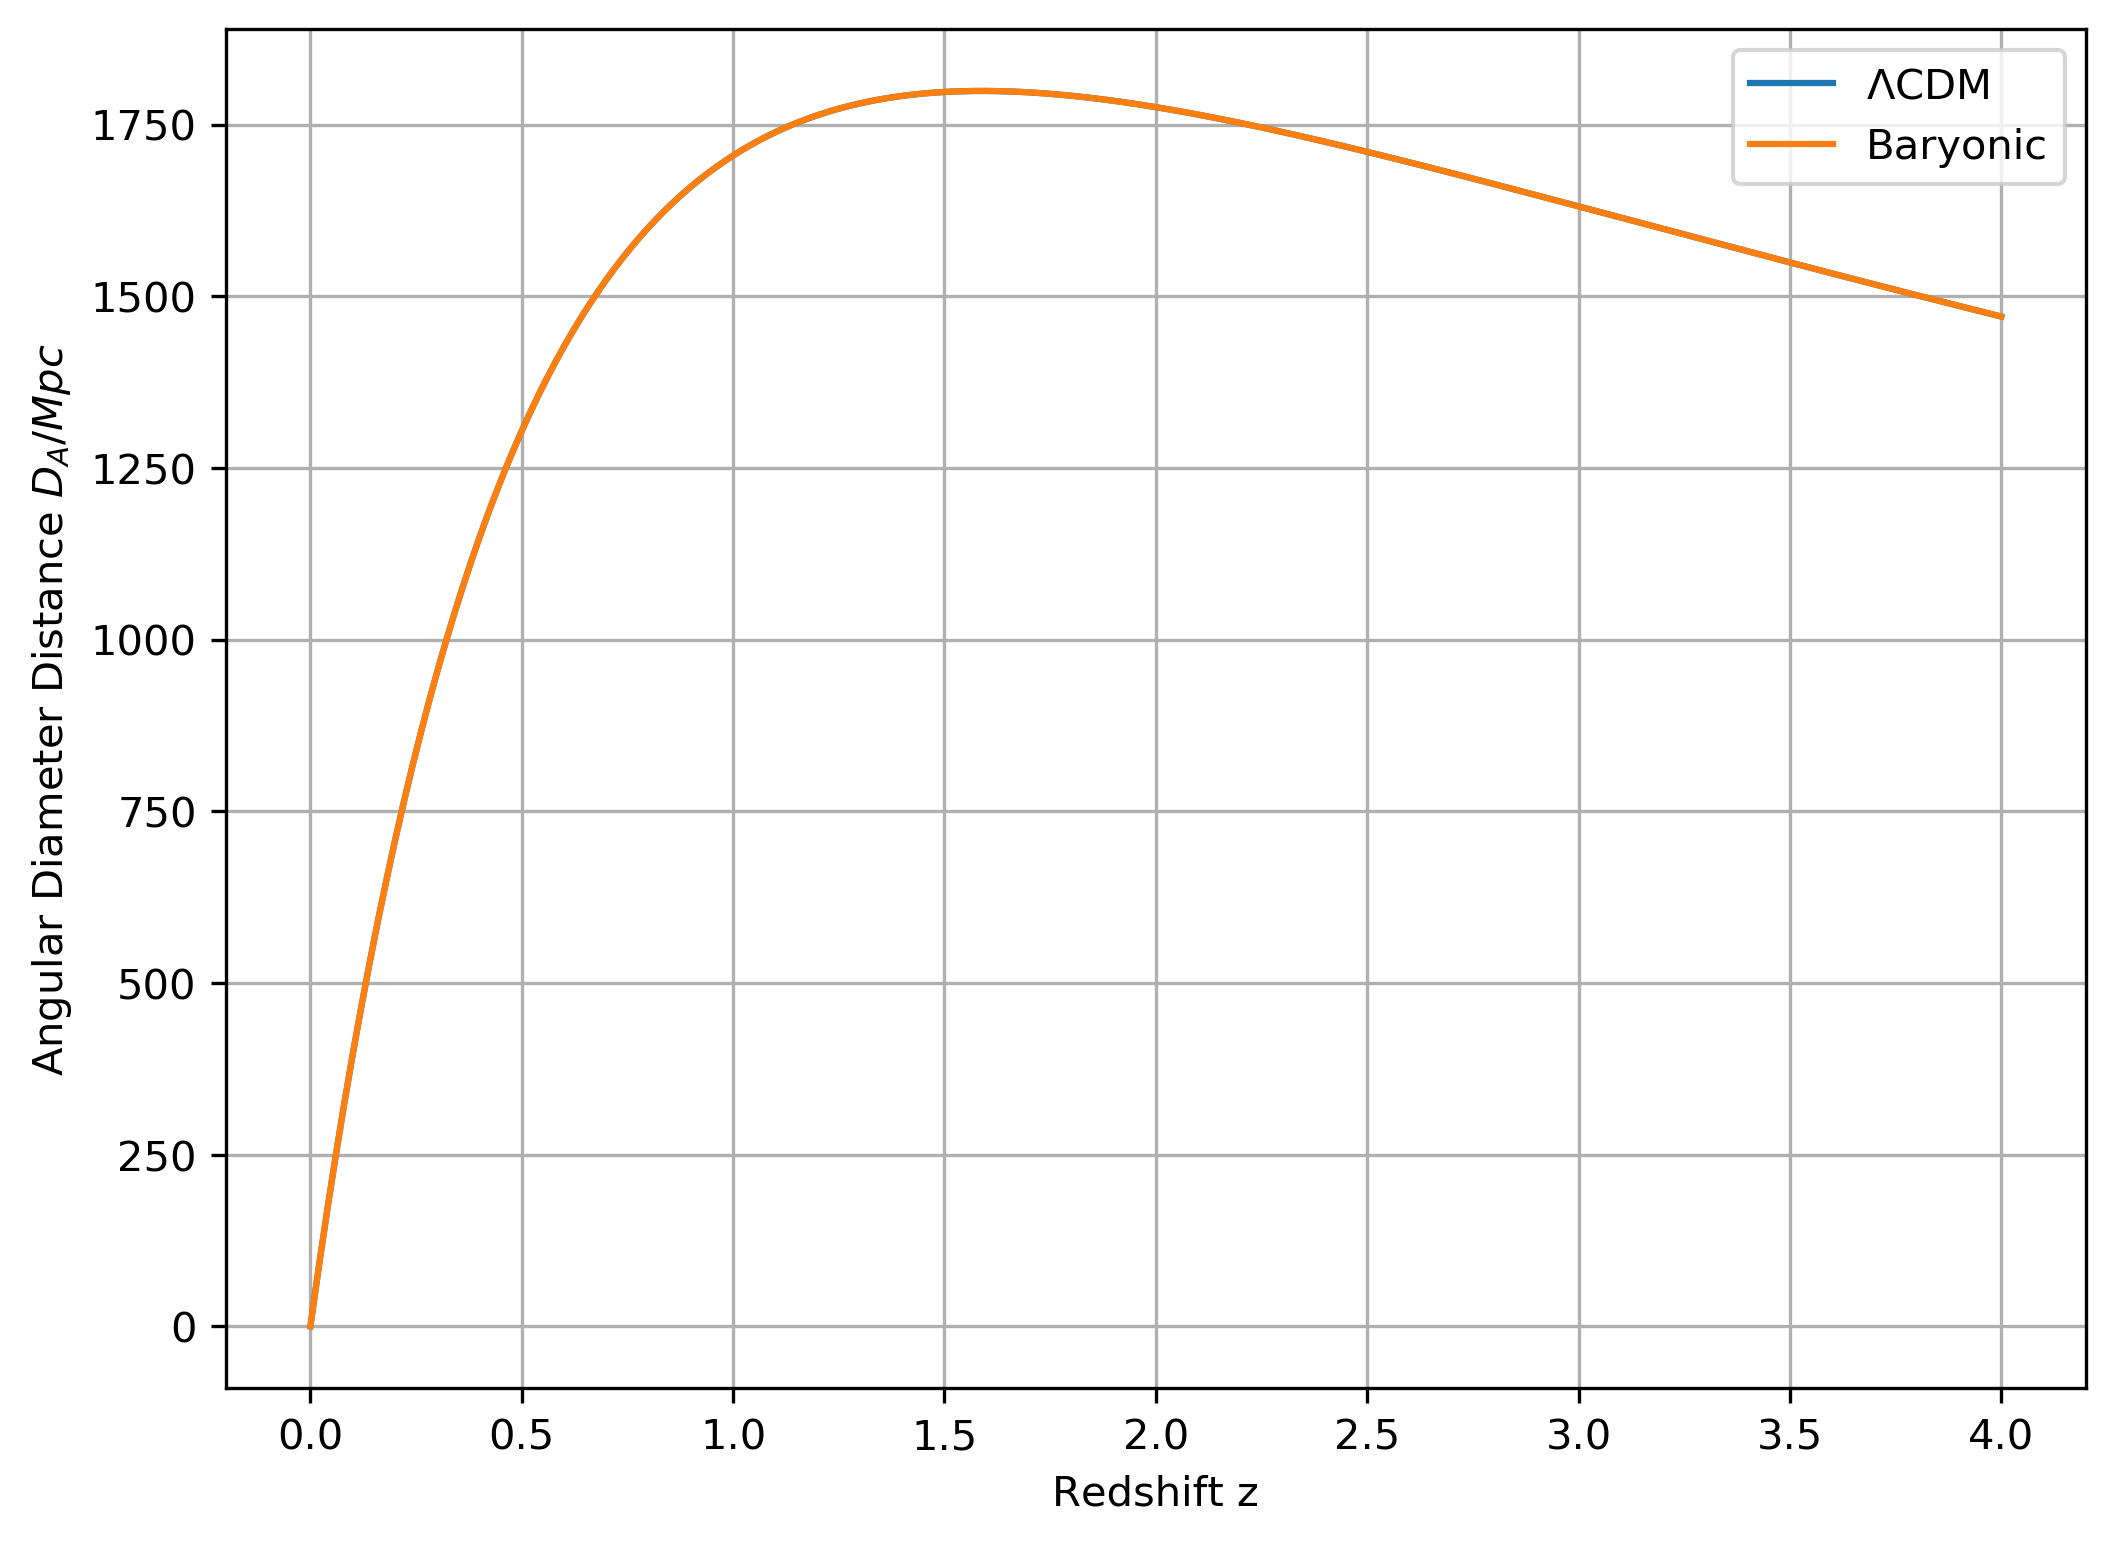

In [23]:
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(np.loadtxt(distance_dir+"z.txt"),np.loadtxt(distance_dir+"d_a.txt"),label="$ \Lambda$CDM")
ax.plot(np.loadtxt(distance_dir1+"z.txt"),np.loadtxt(distance_dir1+"d_a.txt"),label="Baryonic")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict["d_a"])

Text(0, 0.5, 'Distance Modulus $\\mu$')

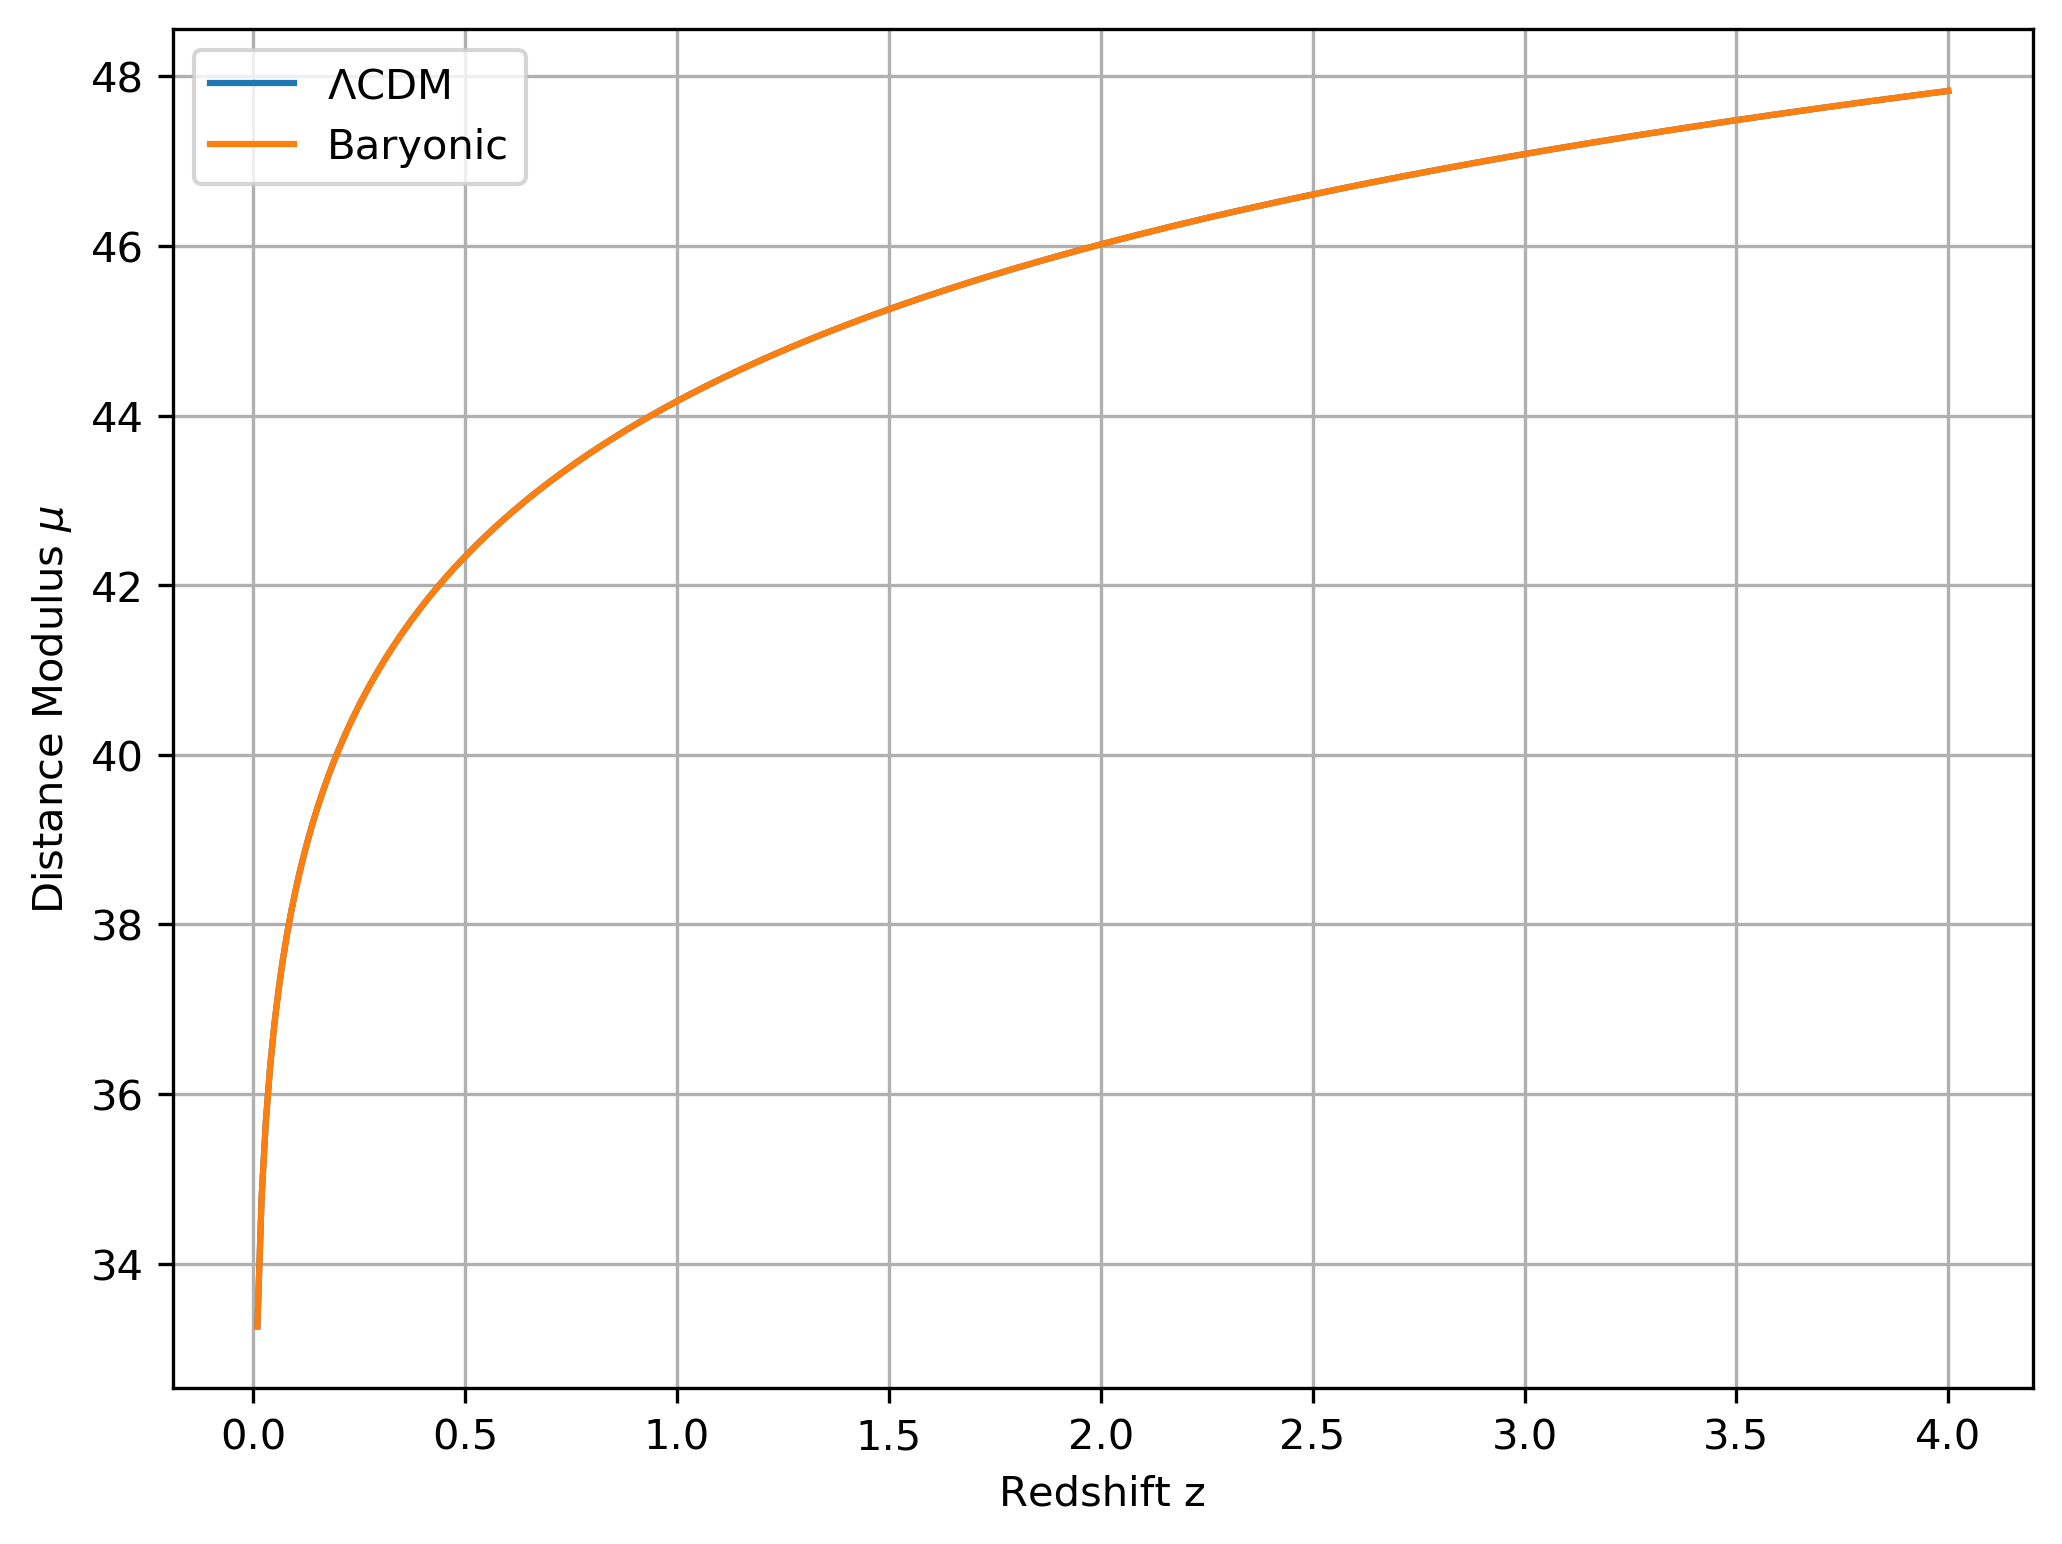

In [24]:
var="mu"
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(np.loadtxt(distance_dir+"z.txt"),np.loadtxt(distance_dir+var+".txt"),label="$ \Lambda$CDM")
ax.plot(np.loadtxt(distance_dir1+"z.txt"),np.loadtxt(distance_dir1+var+".txt"),label="Baryonic")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict[var])

Text(0, 0.5, 'Hubble Parameter $H(z) / (km/s/Mpc)$')

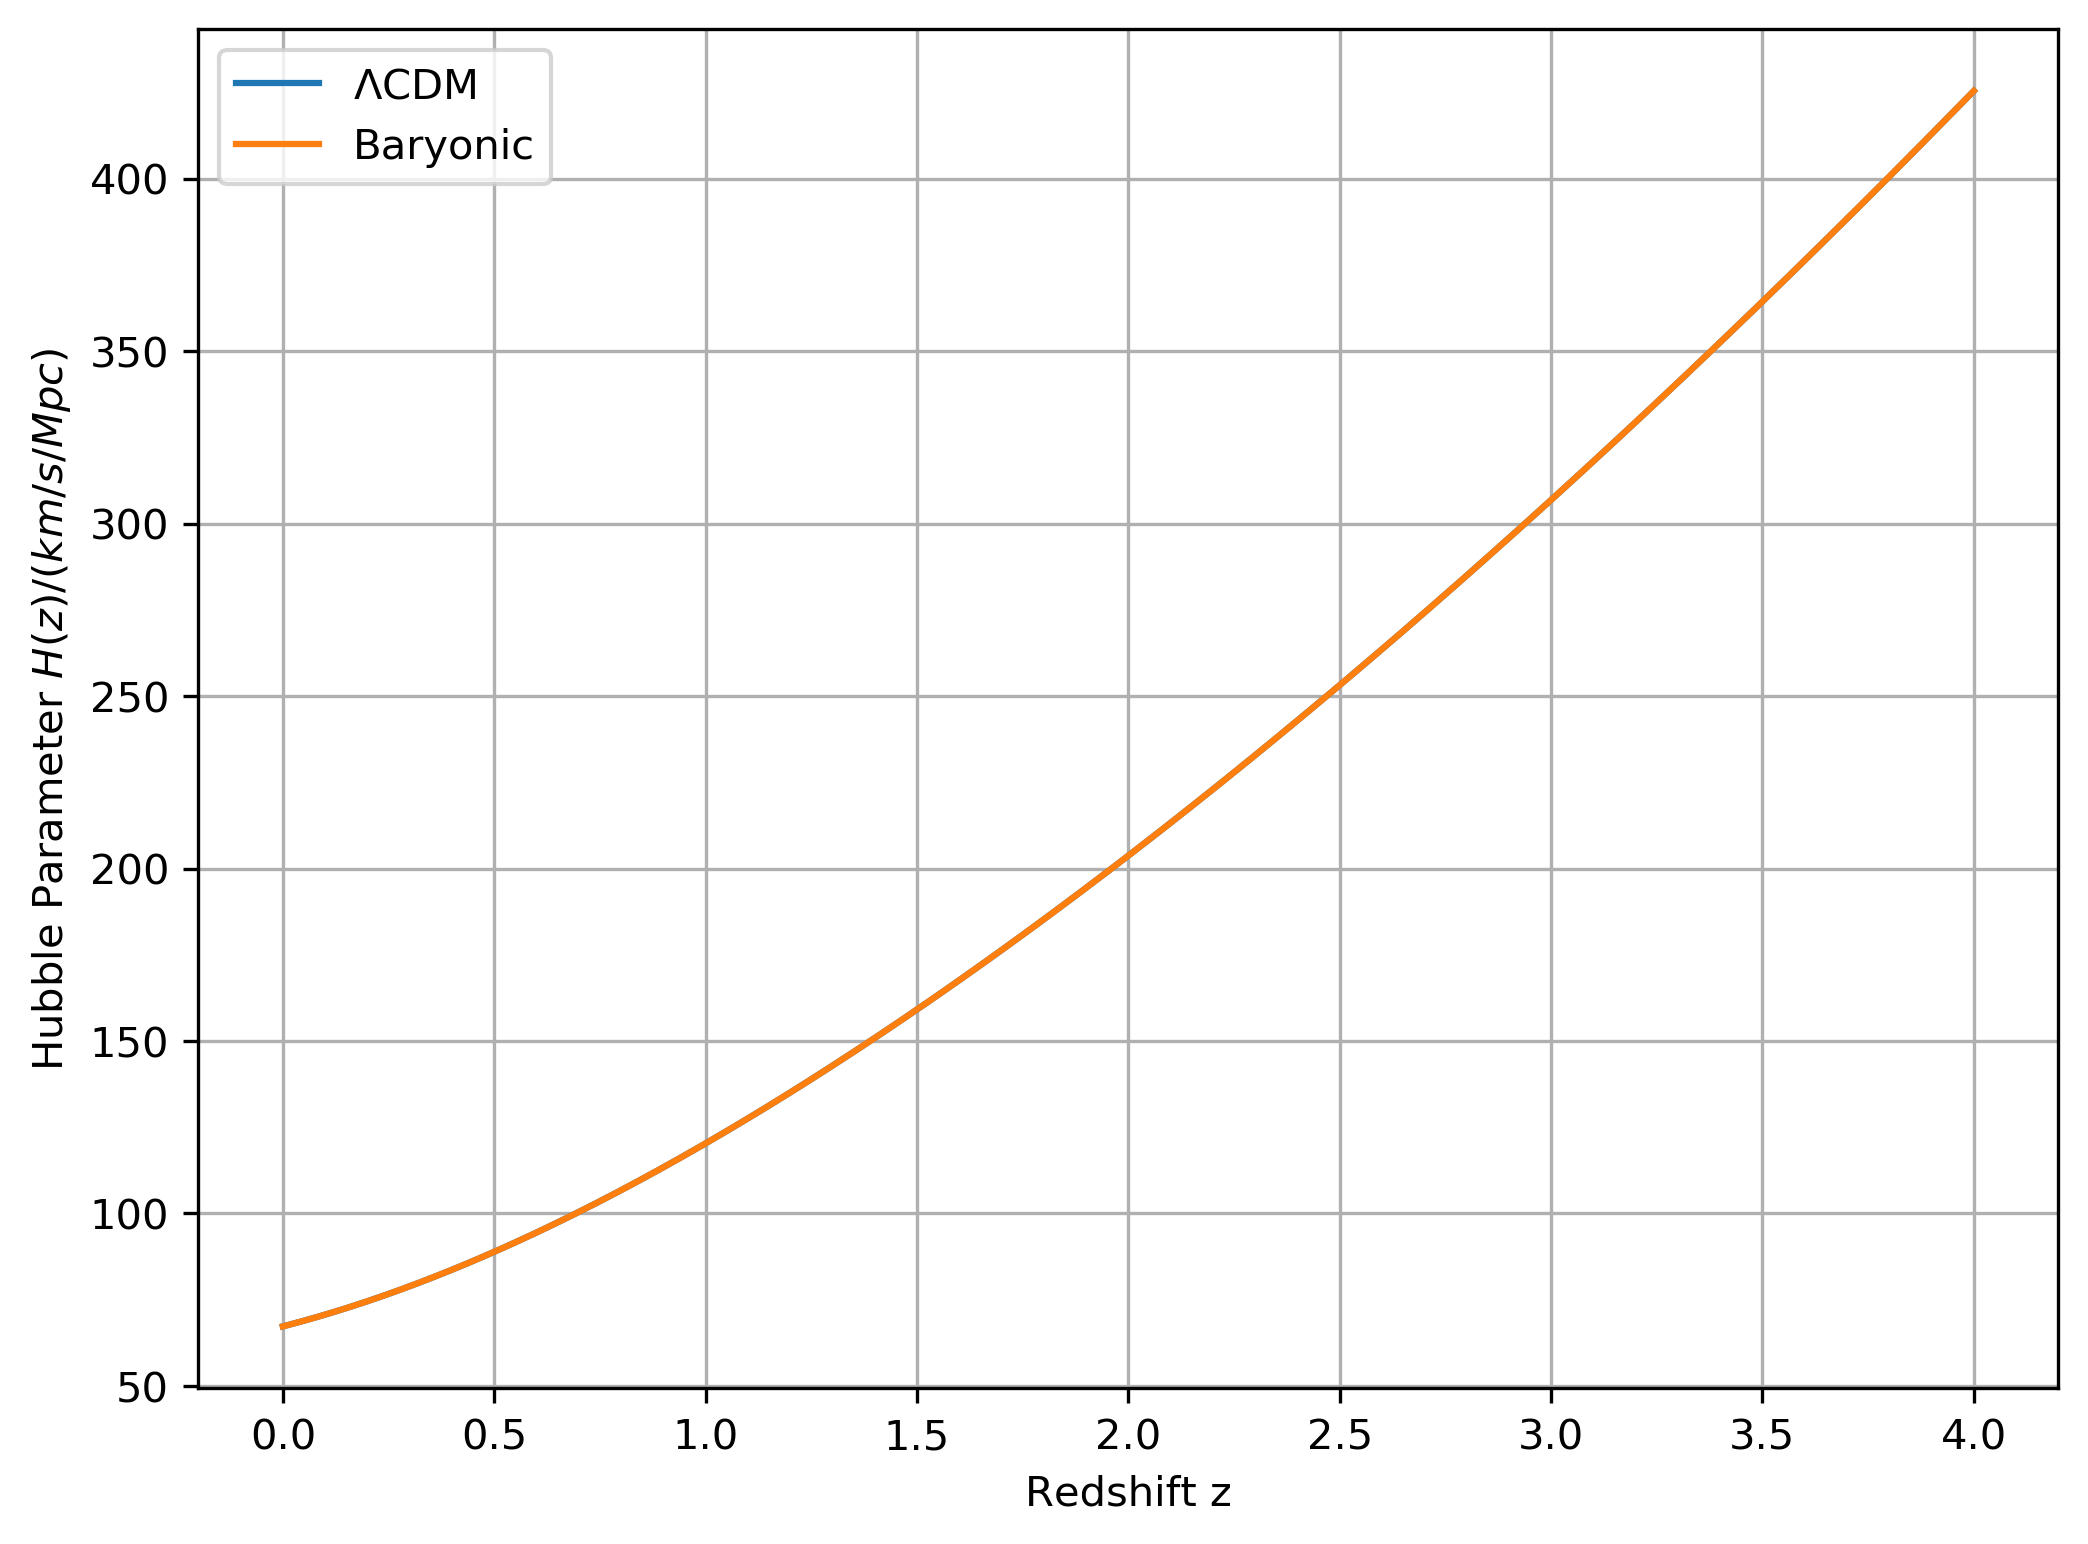

In [25]:
var="h"
scaling = 2.99792458e+05
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(np.loadtxt(distance_dir+"z.txt"),np.loadtxt(distance_dir+var+".txt")*scaling,label="$ \Lambda$CDM")
ax.plot(np.loadtxt(distance_dir1+"z.txt"),np.loadtxt(distance_dir1+var+".txt")*scaling,label="Baryonic")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict[var])

It makes sense that the distance measures are invariant with chagnes in $\Omega_0$, for $\Omega_\Lambda$ stays the same.

Text(0, 0.5, '$P(k) / (h^1 Mpc)^3$')

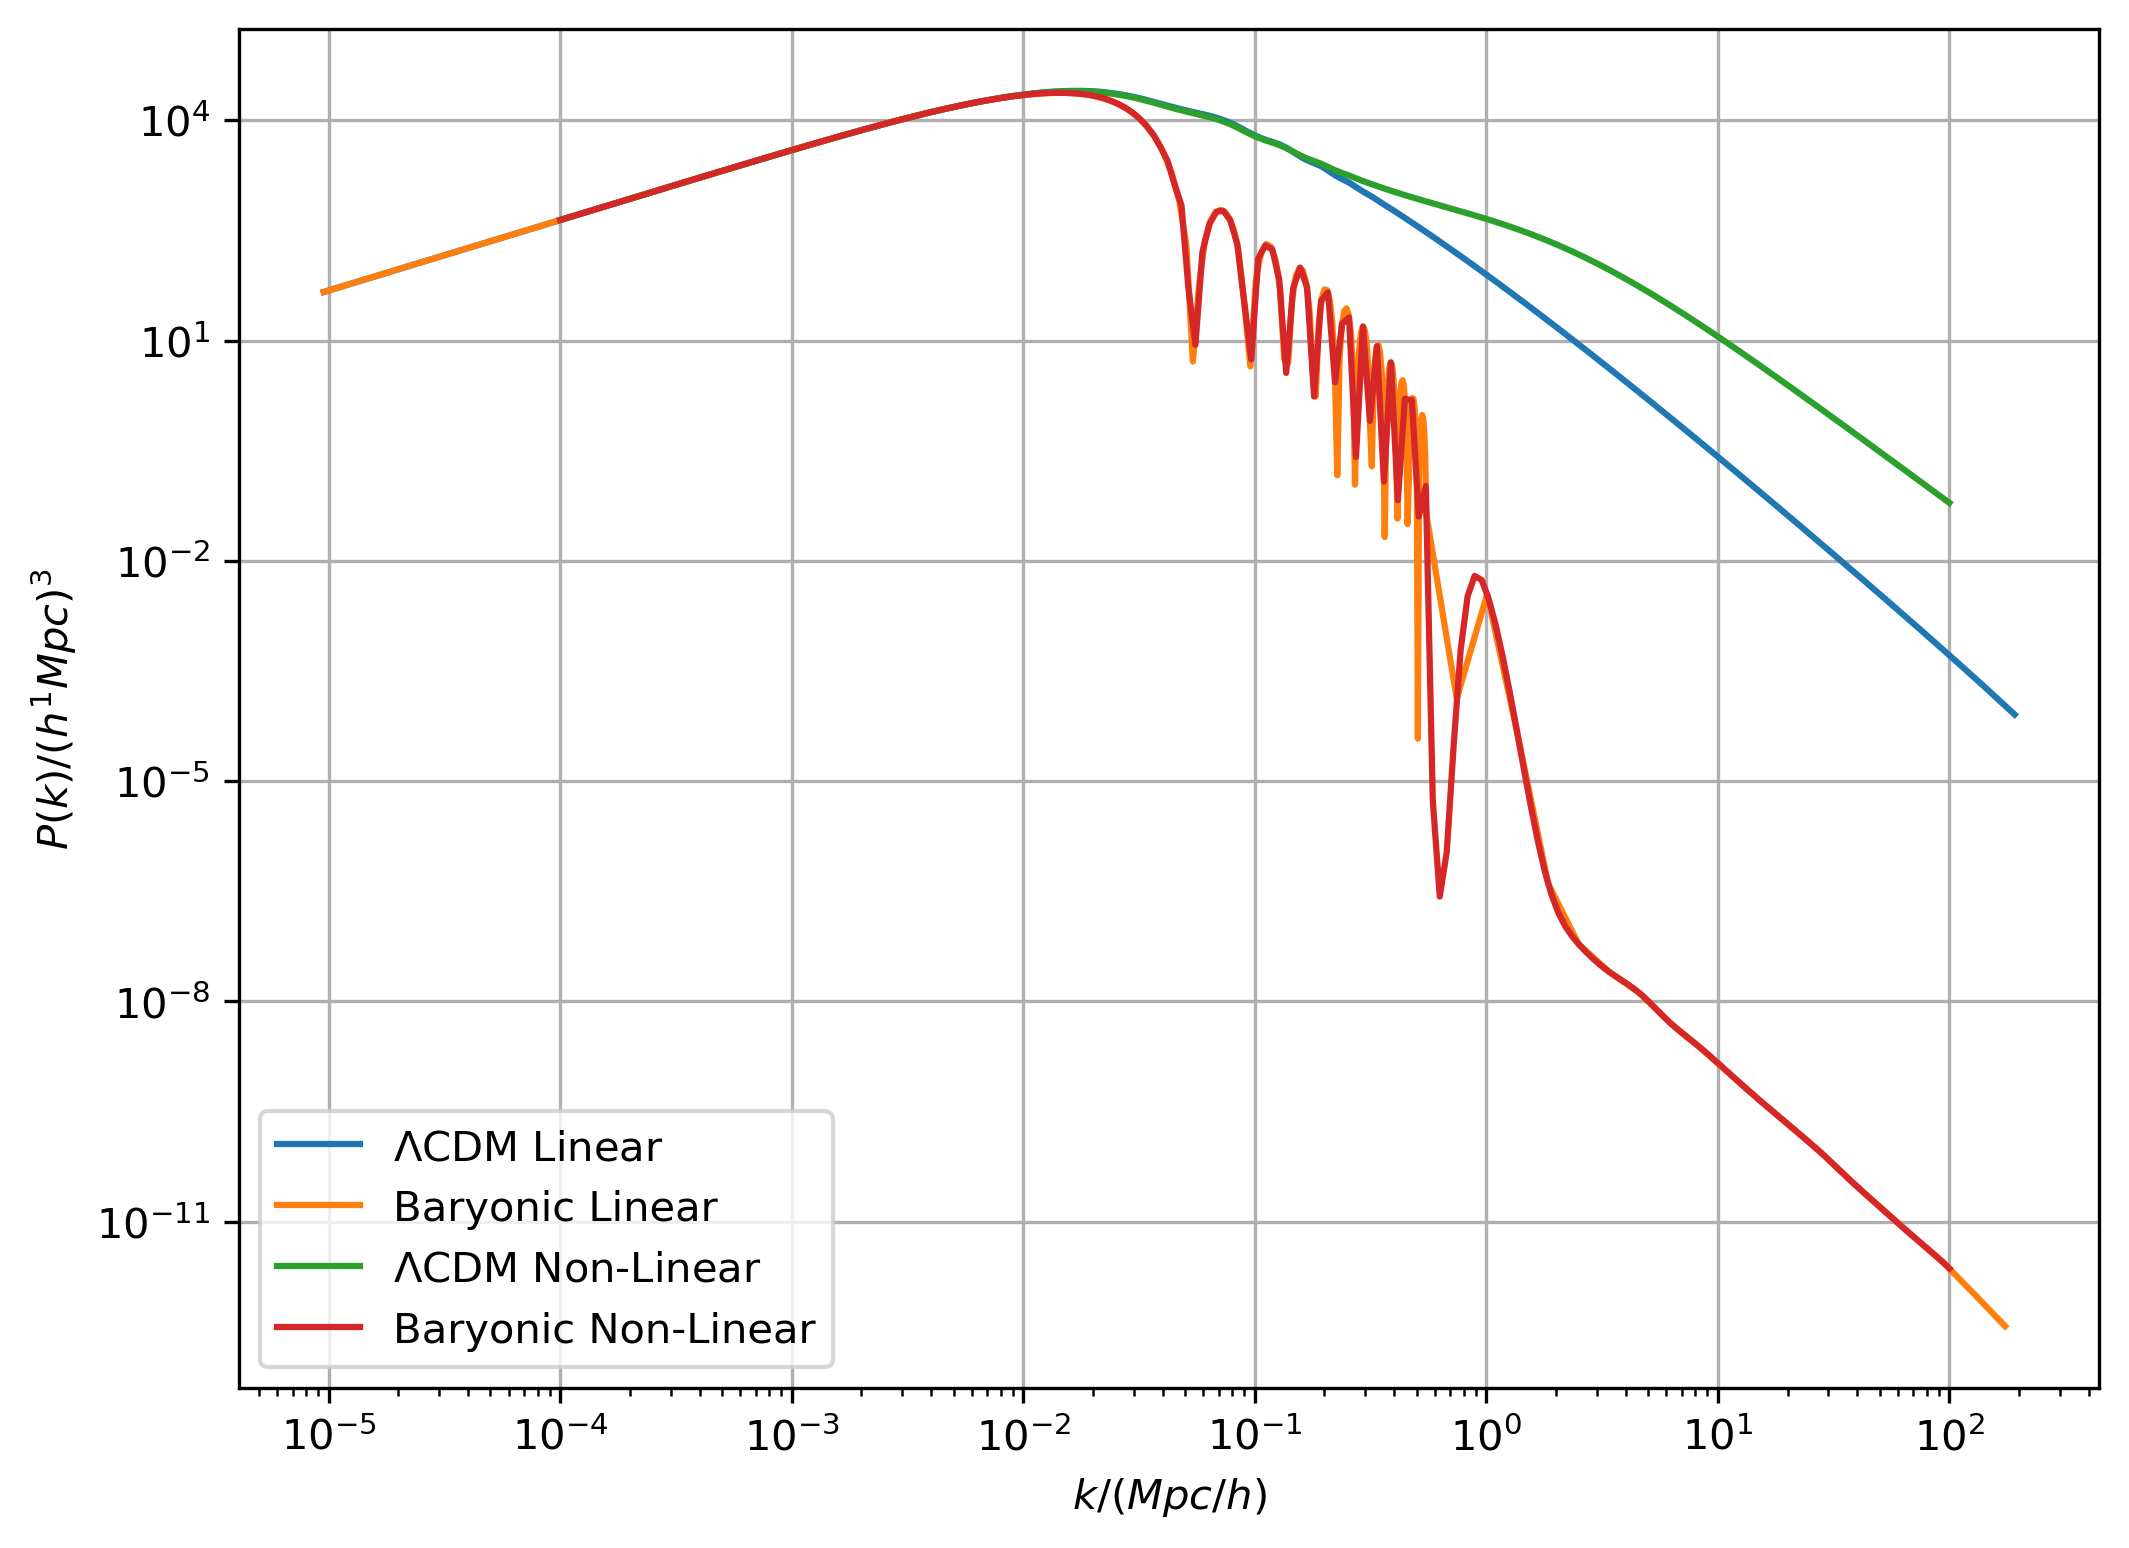

In [26]:
# var="h"
# scaling = 2.9979
# fig, ax = plt.subplots(figsize=(8,6),dpi=300)
# # ax.plot(np.loadtxt(output+"z.txt"),np.loadtxt(distance_dir+var+".txt")*scaling,label="$ \Lambda$CDM")
# ax.plot(,,label="Baryonic",log=True)
# ax.grid()
# ax.legend()


def plot_mps(path,label):

    kh =np.loadtxt(path+"k_h.txt")
    z = np.loadtxt(path+"z.txt")
    p = np.loadtxt(path+"p_k.txt")
    if (p<0).all(): p*=-1
    z = np.atleast_1d(z)
    kh = np.atleast_1d(kh)
    p = np.atleast_2d(p)
    nk = len(kh)
    nz = len(z)
    if p.shape==(nz,nk):
        p = p.T
    plt.loglog(kh, p[:,0], label=label)



# ax.grid()
# ax.legend()

fig, ax = plt.subplots(figsize=(8,6),dpi=300)
plot_mps(output1+"matter_power_lin/",lcdm+" Linear")
plot_mps(output+"matter_power_lin/","Baryonic"+" Linear")
plot_mps(output1+"matter_power_nl/",lcdm+" Non-Linear")
plot_mps(output+"matter_power_nl/","Baryonic"+" Non-Linear")
plt.legend()
ax.grid()
ax.set_xlabel("$k / (Mpc/h)$")
ax.set_ylabel("$P(k) / (h^1 Mpc)^3$")

We see signs of baryon drag as described in http://background.uchicago.edu/~whu/physics/baryon.html.

## DES Data

### Cosmic Shear

In [27]:
data_dir=cosmosis+"data/test_output_dir/data_vector/"
data1_dir=cosmosis+"data1/test_output_dir/data_vector/"

In [28]:
angle=np.loadtxt(data_dir+"2pt_angle.txt")
bin1=np.loadtxt(data_dir+"2pt_bin1.txt")
bin2=np.loadtxt(data_dir+"2pt_bin2.txt")

bins = np.column_stack((bin1,bin2))


pt_data=np.loadtxt(data_dir+"2pt_data.txt")
pt_theory=np.loadtxt(data_dir+"2pt_theory.txt")
pt_theory1=np.loadtxt(data1_dir+"2pt_theory.txt")
pt_err=np.sqrt(np.diag(np.loadtxt(data1_dir+"2pt_covariance.txt")))
vec=np.column_stack((bins,angle,pt_data,pt_theory,pt_theory1,pt_err))


N=167

vec_p=vec[0:N]
vec_m=vec[N:]

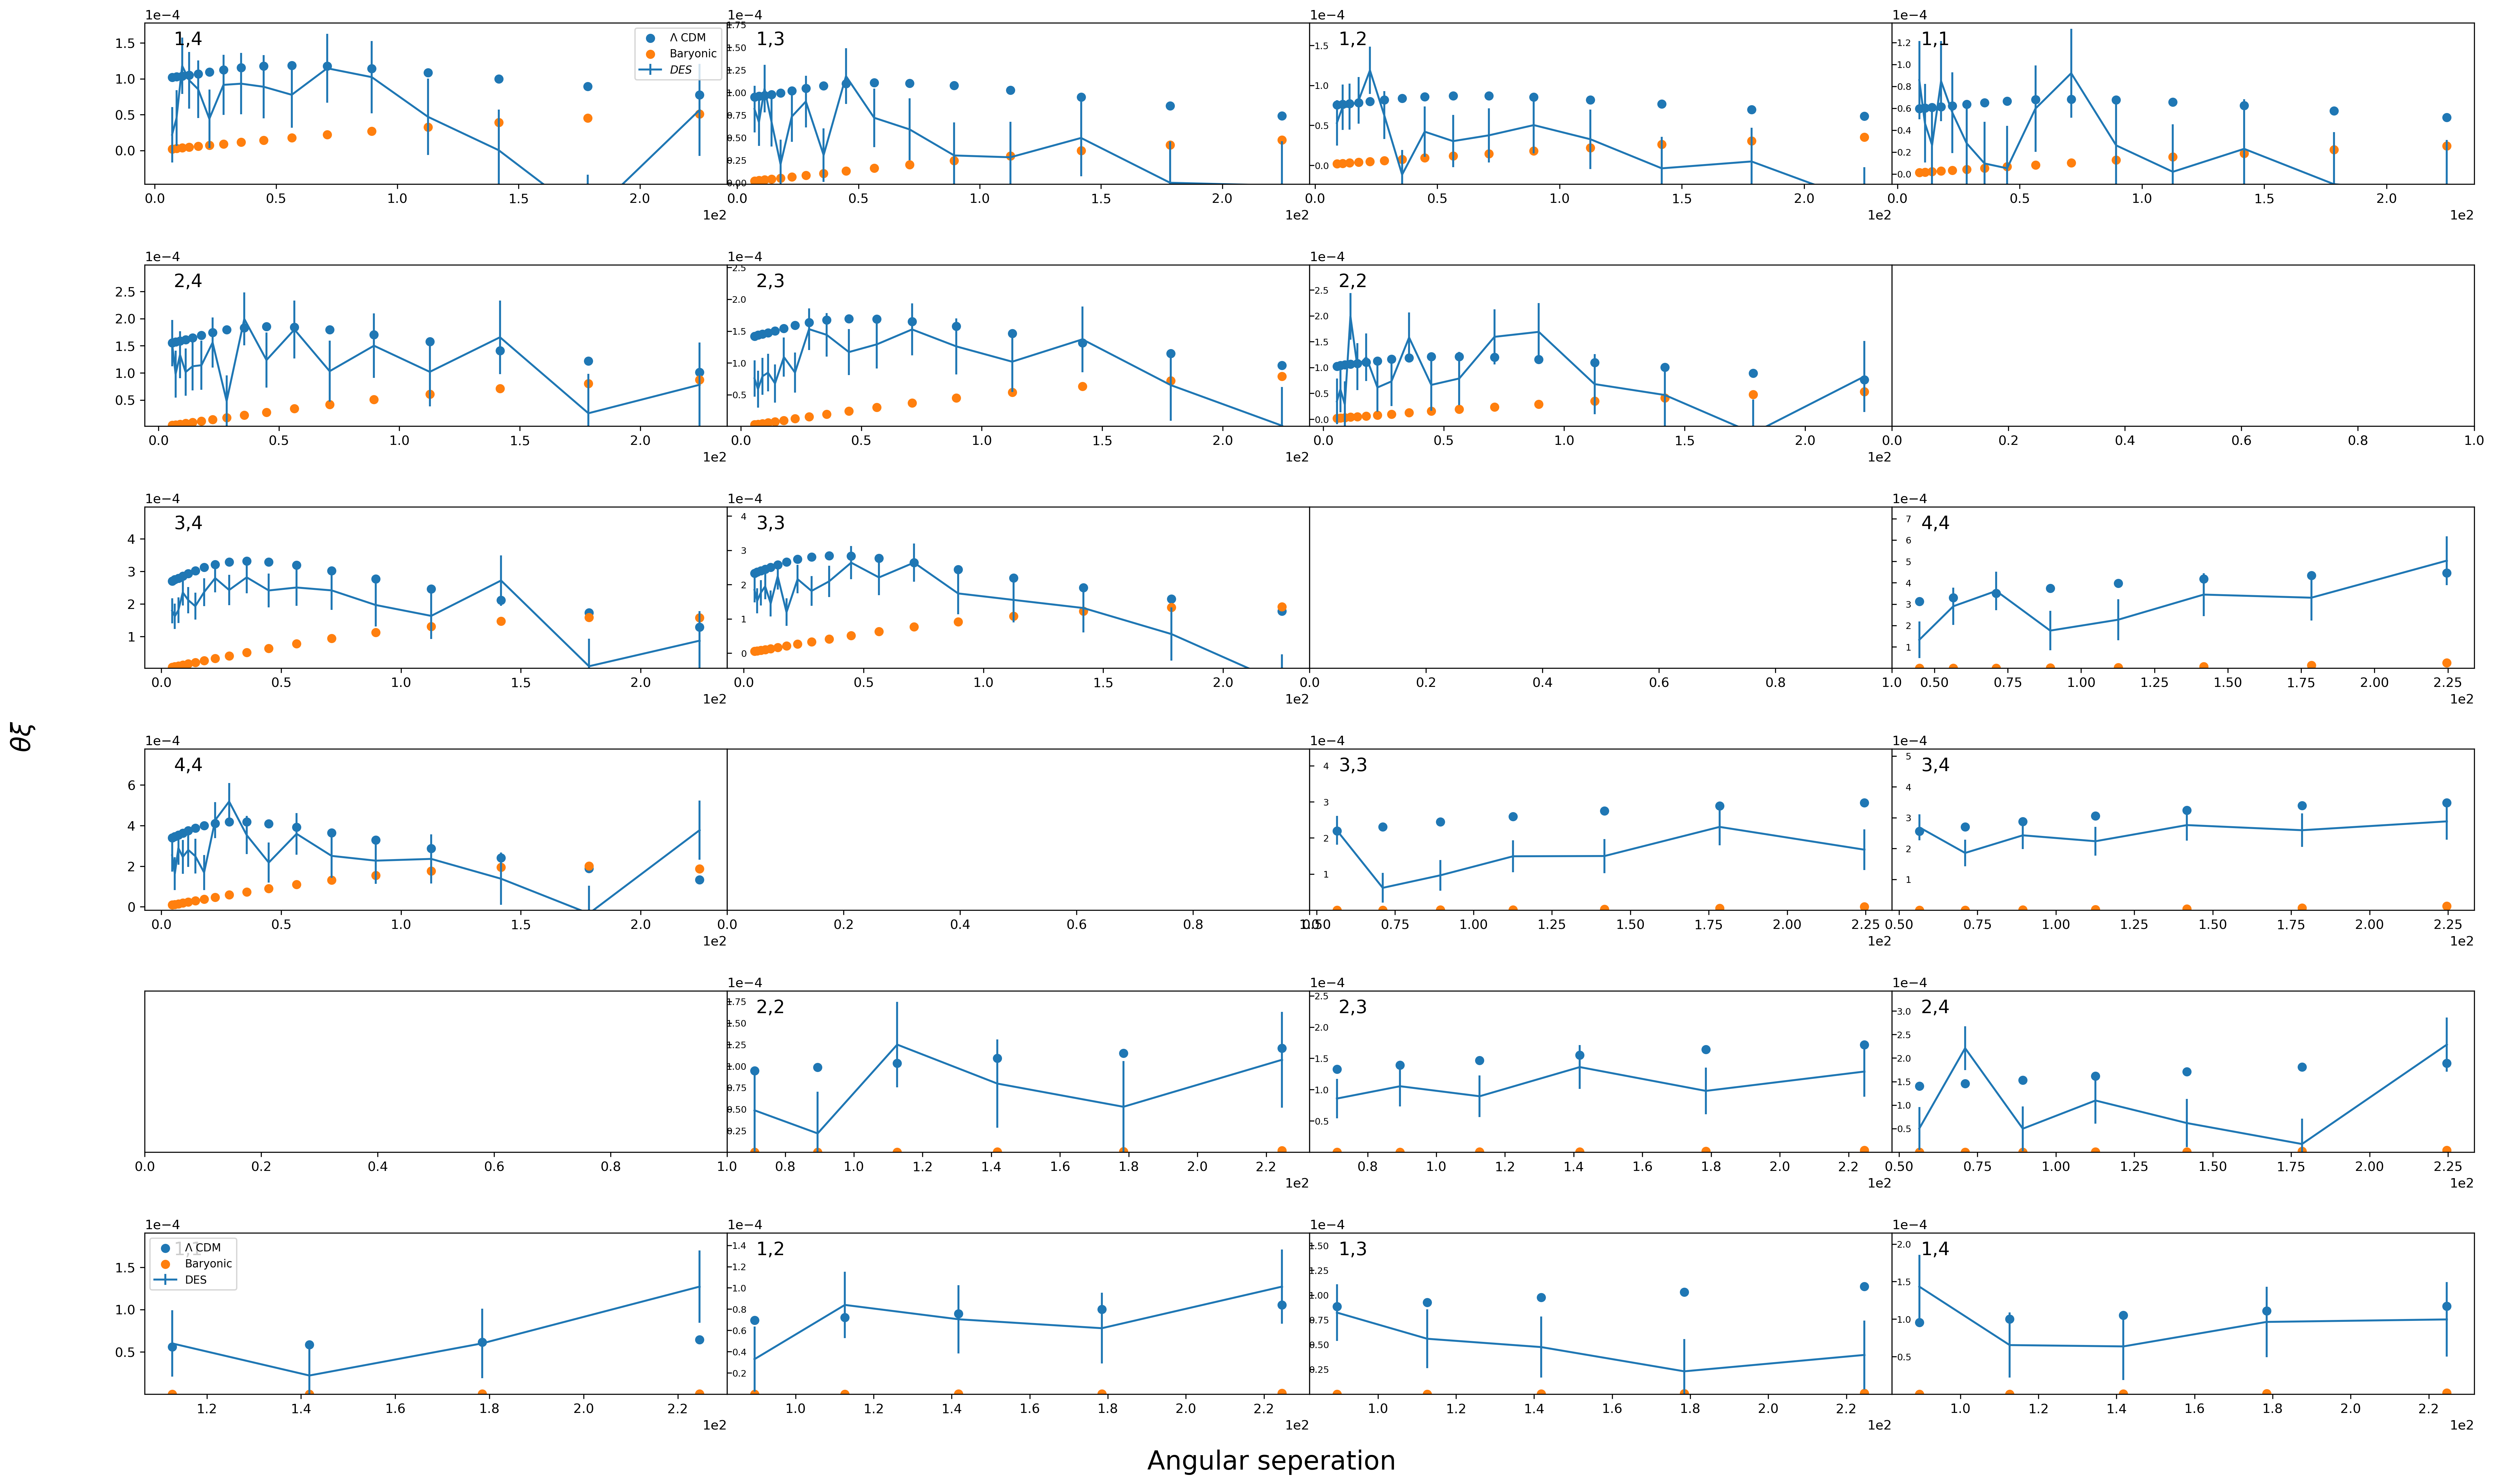

In [29]:
fig,axes=plt.subplots(6,4,figsize=(32,20),dpi=300)
plt.subplots_adjust(bottom=0.15, wspace=0.00,hspace=0.5)


fig.text(0.5, 0.11, 'Angular seperation', ha='center',fontsize=20)
fig.text(0.08, 0.5, r'$\theta \xi$', va='center', rotation='vertical',fontsize=20)

for j in range(4):
    axes[4-j,j].set_yticks([])

for i in range(4):
    for j in range(4):
        
        if j>=i:
        
            x=3-j
            y=i
            

            data = np.array([vec for vec in vec_p if vec[0]==i+1 and vec[1]==j+1])


            angle = data[:,2]*360*60/2/np.pi
            xi_data=data[:,3]*angle
            xi_theory=data[:,4]*angle
            xi_theory1=data[:,5]*angle
            xi_err=data[:,6]*angle
            

            axes[y,x].errorbar(angle,xi_data,yerr=xi_err,label=r"$DES$")
            axes[y,x].scatter(angle,xi_theory,label=r"$\Lambda$ CDM")
            axes[y,x].scatter(angle,xi_theory1,label=r"Baryonic")
            axes[y,x].set_ylim(0.5*min(np.concatenate([xi_data,xi_theory,xi_theory1])),1.5*max(np.concatenate([xi_data,xi_theory,xi_theory1])))
            if (x,y)==(0,0):
                axes[y,x].legend(fontsize="small")
            
            if x==0:
                axes[y,x].ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
            else:
                axes[y,x].tick_params(axis="y",direction="in",pad=-15,labelsize=7)
                
            axes[y,x].ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
            props = dict(boxstyle='round', facecolor='b', alpha=0)

            axes[y,x].text(0.05, 0.95, "{},{}".format(i+1,j+1), transform=axes[y,x].transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
            
for i in range(4):
    for j in range(4):
        
        if j>=i:
        
            x=j
            y=5-i
            

            data = np.array([vec for vec in vec_m if vec[0]==i+1 and vec[1]==j+1])


            angle = data[:,2]*360*60/2/np.pi
            xi_data=data[:,3]*angle
            xi_theory=data[:,4]*angle
            xi_theory1=data[:,5]*angle
            xi_err=data[:,6]*angle
            

            axes[y,x].errorbar(angle,xi_data,yerr=xi_err,label=r"DES")
            axes[y,x].scatter(angle,xi_theory,label=r"$\Lambda$ CDM")
            axes[y,x].scatter(angle,xi_theory1,label=r"Baryonic")
            axes[y,x].set_ylim(0.5*min(np.concatenate([xi_data,xi_theory,xi_theory1])),1.5*max(np.concatenate([xi_data,xi_theory,xi_theory1])))
            
            
            axes[5,0].legend(fontsize="small")
            
            if x==0:
                axes[y,x].ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
            else:
                axes[y,x].tick_params(axis="y",direction="in",pad=-15,labelsize=7)
                
            props = dict(boxstyle='round', facecolor='b', alpha=0)
            axes[y,x].ticklabel_format(axis='both', style='sci', scilimits=(-1,1))

            axes[y,x].text(0.05, 0.95, "{},{}".format(i+1,j+1), transform=axes[y,x].transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
            


It seems that DES' data have a pretty good fit with the $\Lambda$CDM model except. It surprising to me that $\xi_{-}$ of the baryonic matter only universe is close to zero. I wonder why is that so? 

For $\Lambda$CDM and baryonic respectively:

```
2pt_chi2 = 291.6781063266292
2pt_log_det = -6342.061170802451
2pt_norm = 3171.0305854012254

2pt_chi2 = 561.9570860951376
2pt_log_det = -6342.061170802451
2pt_norm = 3171.0305854012254

```

In the case of $\Lambda$CDM, it seems much contribution of the $\chi^2$ is from the diffence in $\xi_+$ at around 200 arcmin. In the case of baryonic model, both $\xi_+$ and $\xi_-$ contribute to the $\chi^2$

### Supernova

In [30]:
u_data=np.loadtxt(data_dir+"pantheon_data.txt")
u_data1=np.loadtxt(data1_dir+"pantheon_data.txt")
u_theory=np.loadtxt(data_dir+"pantheon_theory.txt")
u_theory1=np.loadtxt(data1_dir+"pantheon_theory.txt")
u_error=np.sqrt(np.diag(np.loadtxt(data1_dir+"pantheon_covariance.txt")))

z=np.loadtxt(cosmosis+"/data/COSMOLOGY_INPUTS/lcparam_DESonly.txt")[:,1]

Text(0, 0.5, 'Distance Modulus $\\mu$')

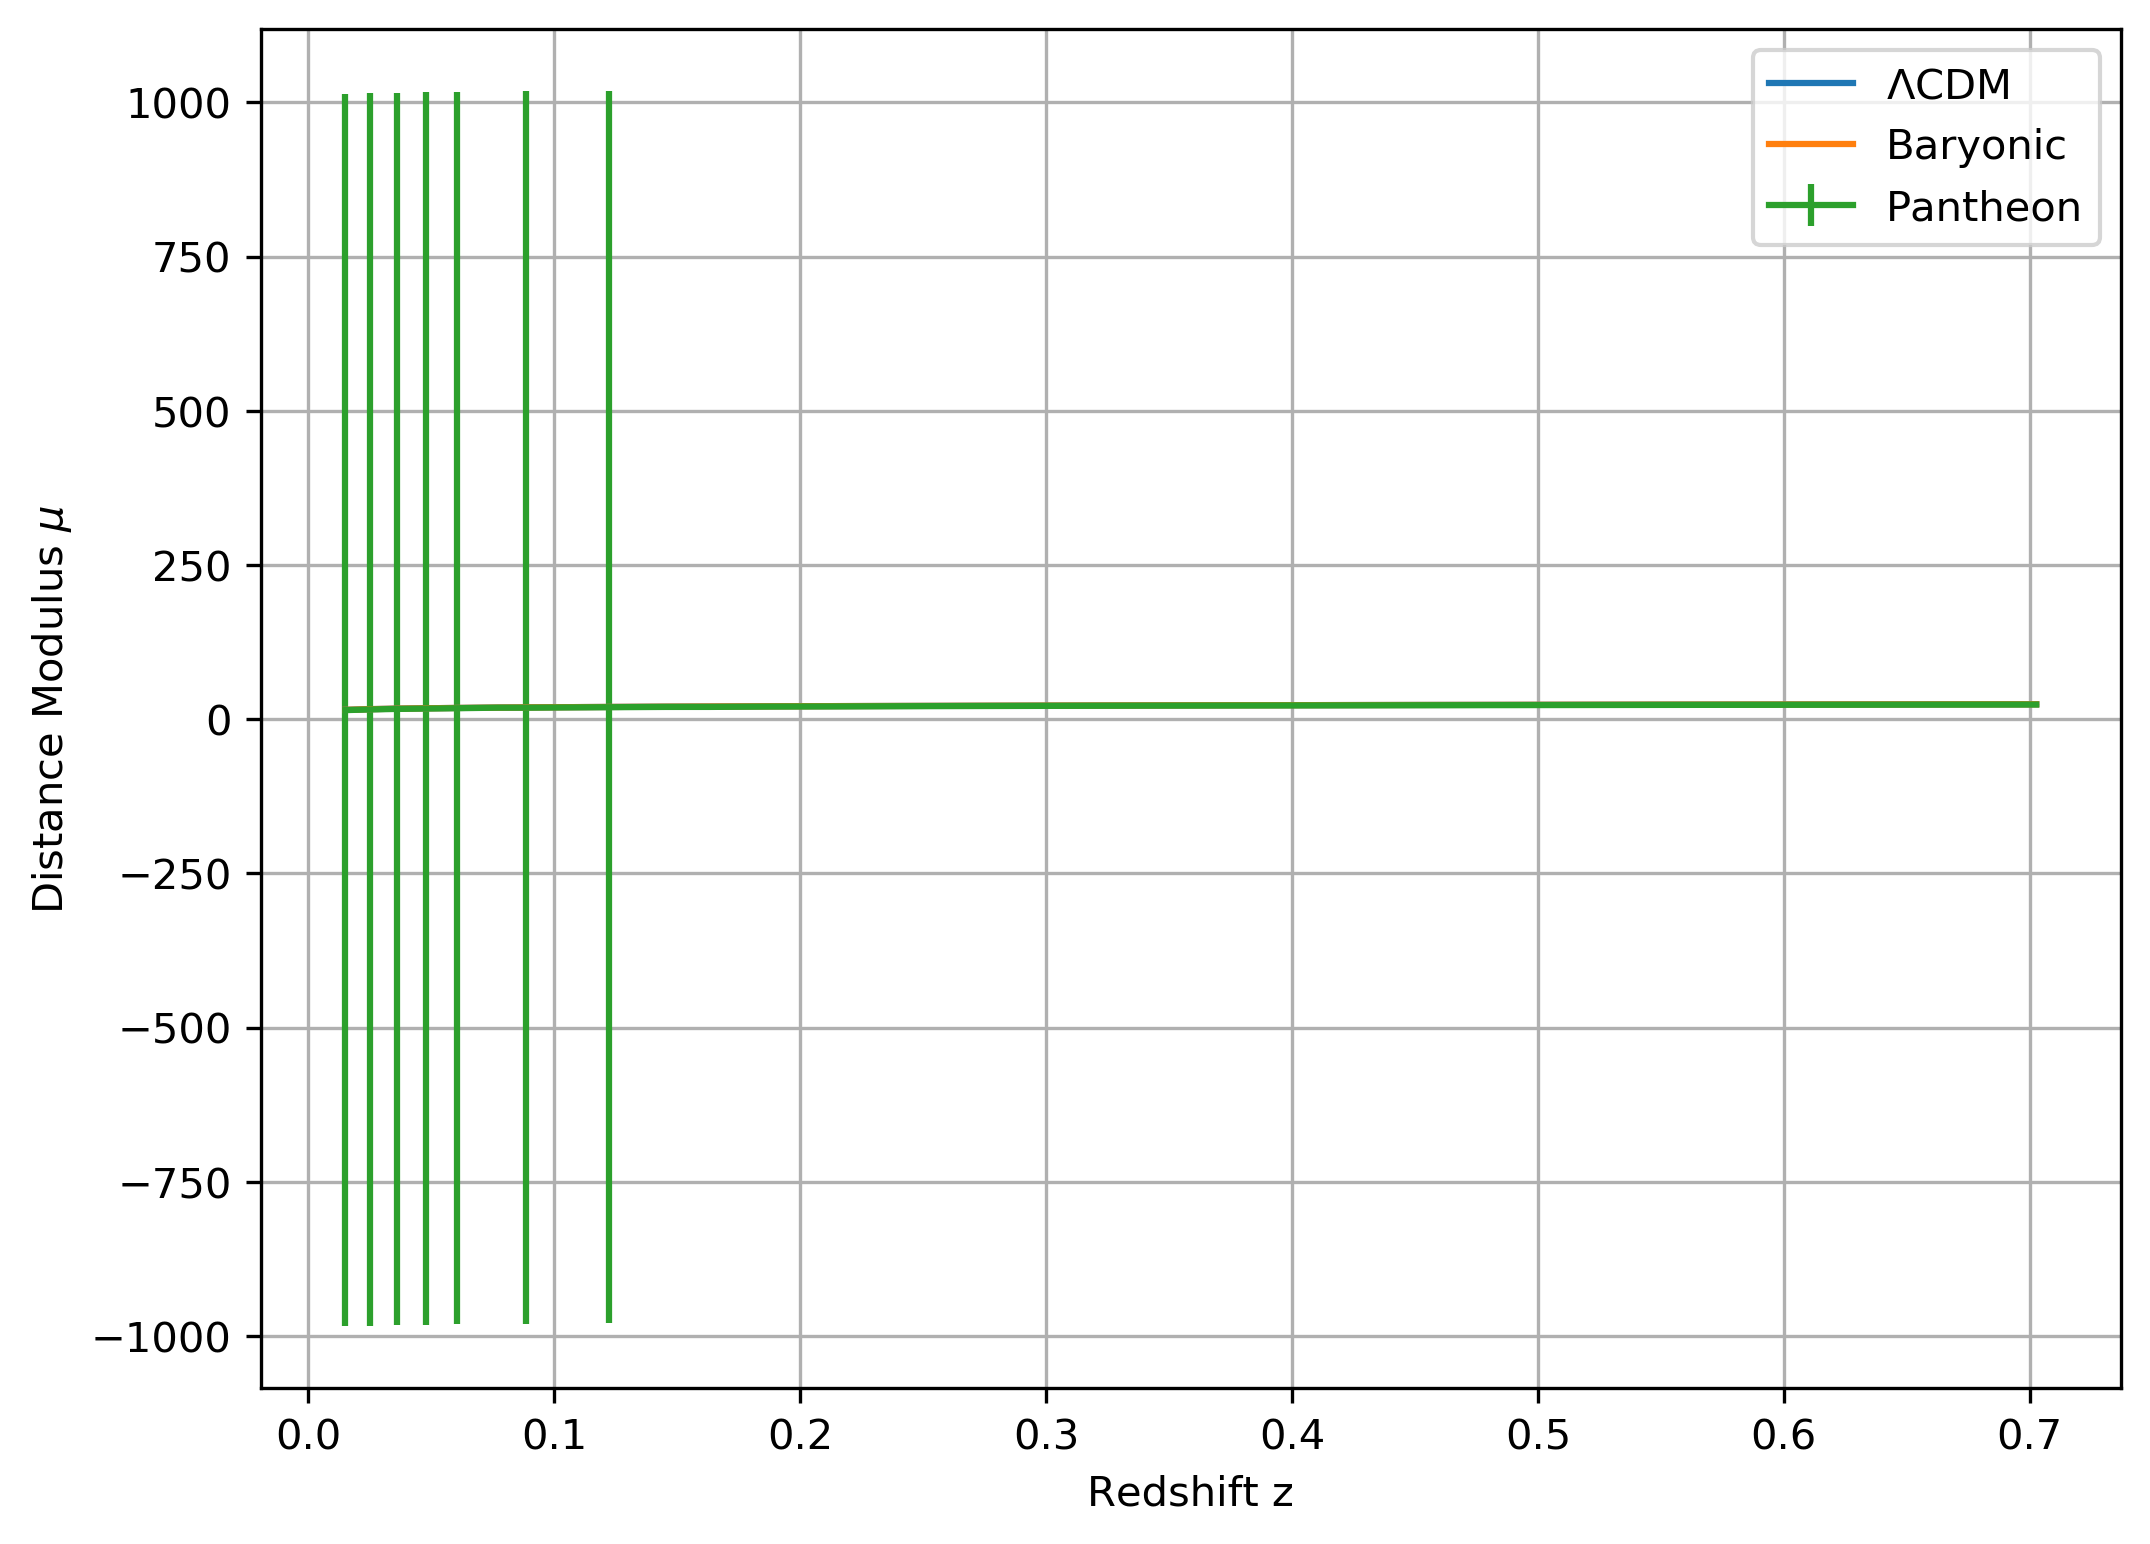

In [31]:
var="mu"
fig, ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(z,u_theory,label="$ \Lambda$CDM")
ax.plot(z,u_theory1,label="Baryonic")
ax.errorbar(z,u_data, yerr=u_error,label="Pantheon")
ax.grid()
ax.legend()
ax.set_xlabel(name_dict["z"])
ax.set_ylabel(name_dict[var])

The error of Pantheon data points
```
array([9.9800100e+05, 9.9800100e+05, 9.9800100e+05, 9.9800100e+05,
       9.9800100e+05, 1.1970410e-02, 9.9800100e+05, 1.7647190e-02,
       9.9800100e+05, 2.1895675e-03, 5.0963850e-03, 1.1522850e-03,
       1.2328025e-03, 7.4519500e-04, 9.8437250e-04, 3.2460500e-04,
       6.6811750e-04, 6.1169750e-04, 8.6948000e-04, 1.3588525e-03])
```

For $\Lambda$CDM and baryonic respectively:
```
pantheon_chi2 = 2589.842898478964
pantheon_log_det = 0.0
pantheon_norm = -0.0
pantheon_chi2 = 2589.842898478964
pantheon_log_det = 0.0
pantheon_norm = -0.0
```
From some reason the variance of the data is very small. So any deviation from the data contributes significantly to the $\chi^2$. This plot does not make sense to me given there are only 20 data points.

## Likelihood: $\Lambda$CDM

In [32]:
lcdm_combined=cosmosis+"data_combined/"
lcdm_shear=cosmosis+"data_shear/"
lcdm_sne=cosmosis+"data_sne/"

wcdm_combined=cosmosis+"data_w_combined/"
wcdm_shear=cosmosis+"data_w_shear/"
wcdm_sne=cosmosis+"data_w_sne/"

lcdm_sn_combined=cosmosis+"data_h_combined/"
lcdm_sn_shear=cosmosis+"data_h_shear/"
lcdm_sn_sne=cosmosis+"data_h_sne/"

lcdm_planck_combined=cosmosis+"data_h0_combined/"
lcdm_planck_shear=cosmosis+"data_h0_shear/"
lcdm_planck_sne=cosmosis+"data_h0_sne/"

closed_combined=cosmosis+"data_b_combined/"
closed_shear=cosmosis+"data_b_shear/"
closed_sne=cosmosis+"data_b_sne/"

### $\Lambda$CDM Shear alone

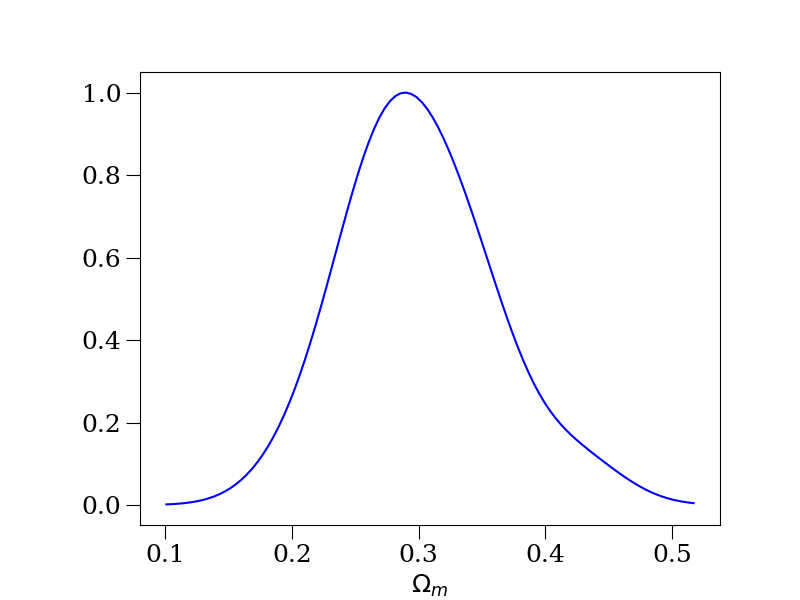

In [33]:
display(Image(lcdm_shear+"plots/shear_cosmological_parameters--omega_m.png",width=500))

```
cosmological_parameters--omega_m        0.289098
cosmological_parameters--a_s        1.96841e-09
cosmological_parameters--h0        0.720954
supernova_params--m        -19.1183
cosmological_parameters--sigma_8        0.824837
prior        20.2558
like        3056.33
post        3076.59
weight        0.0017927
```

### $\Lambda$CDM SNe alone

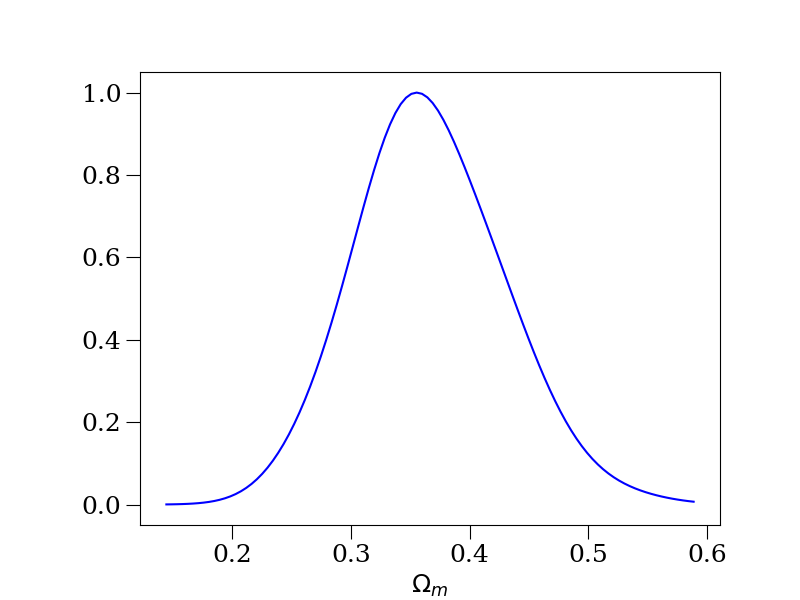

In [34]:
display(Image(lcdm_sne+"plots/sne_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.365846
cosmological_parameters--a_s        2.07644e-09
cosmological_parameters--h0        0.714648
supernova_params--m        -19.2638
cosmological_parameters--sigma_8        0.985223
prior        20.2558
like        -11.168
post        9.08773
weight        0.00181657

```

### $\Lambda$CDM Combined

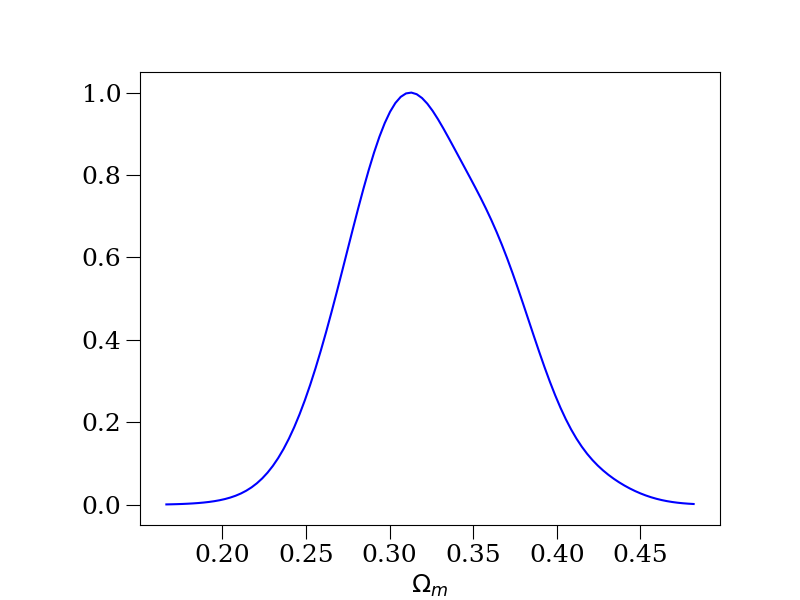

In [35]:
display(Image(lcdm_combined+"plots/combined_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.351276
cosmological_parameters--a_s        1.48929e-09
cosmological_parameters--h0        0.648521
supernova_params--m        -19.4839
cosmological_parameters--sigma_8        0.726014
prior        20.2558
like        3044.91
post        3065.17
weight        0.0018275
```

The $\Omega_m$ output from SNe is higher than that from the shear, and the combined result is constrained more by SNe. It is insteresting that the posterior of $H_0$ in the combined result is very small. 

### $\Lambda$CDM Troxel et. al. 2016

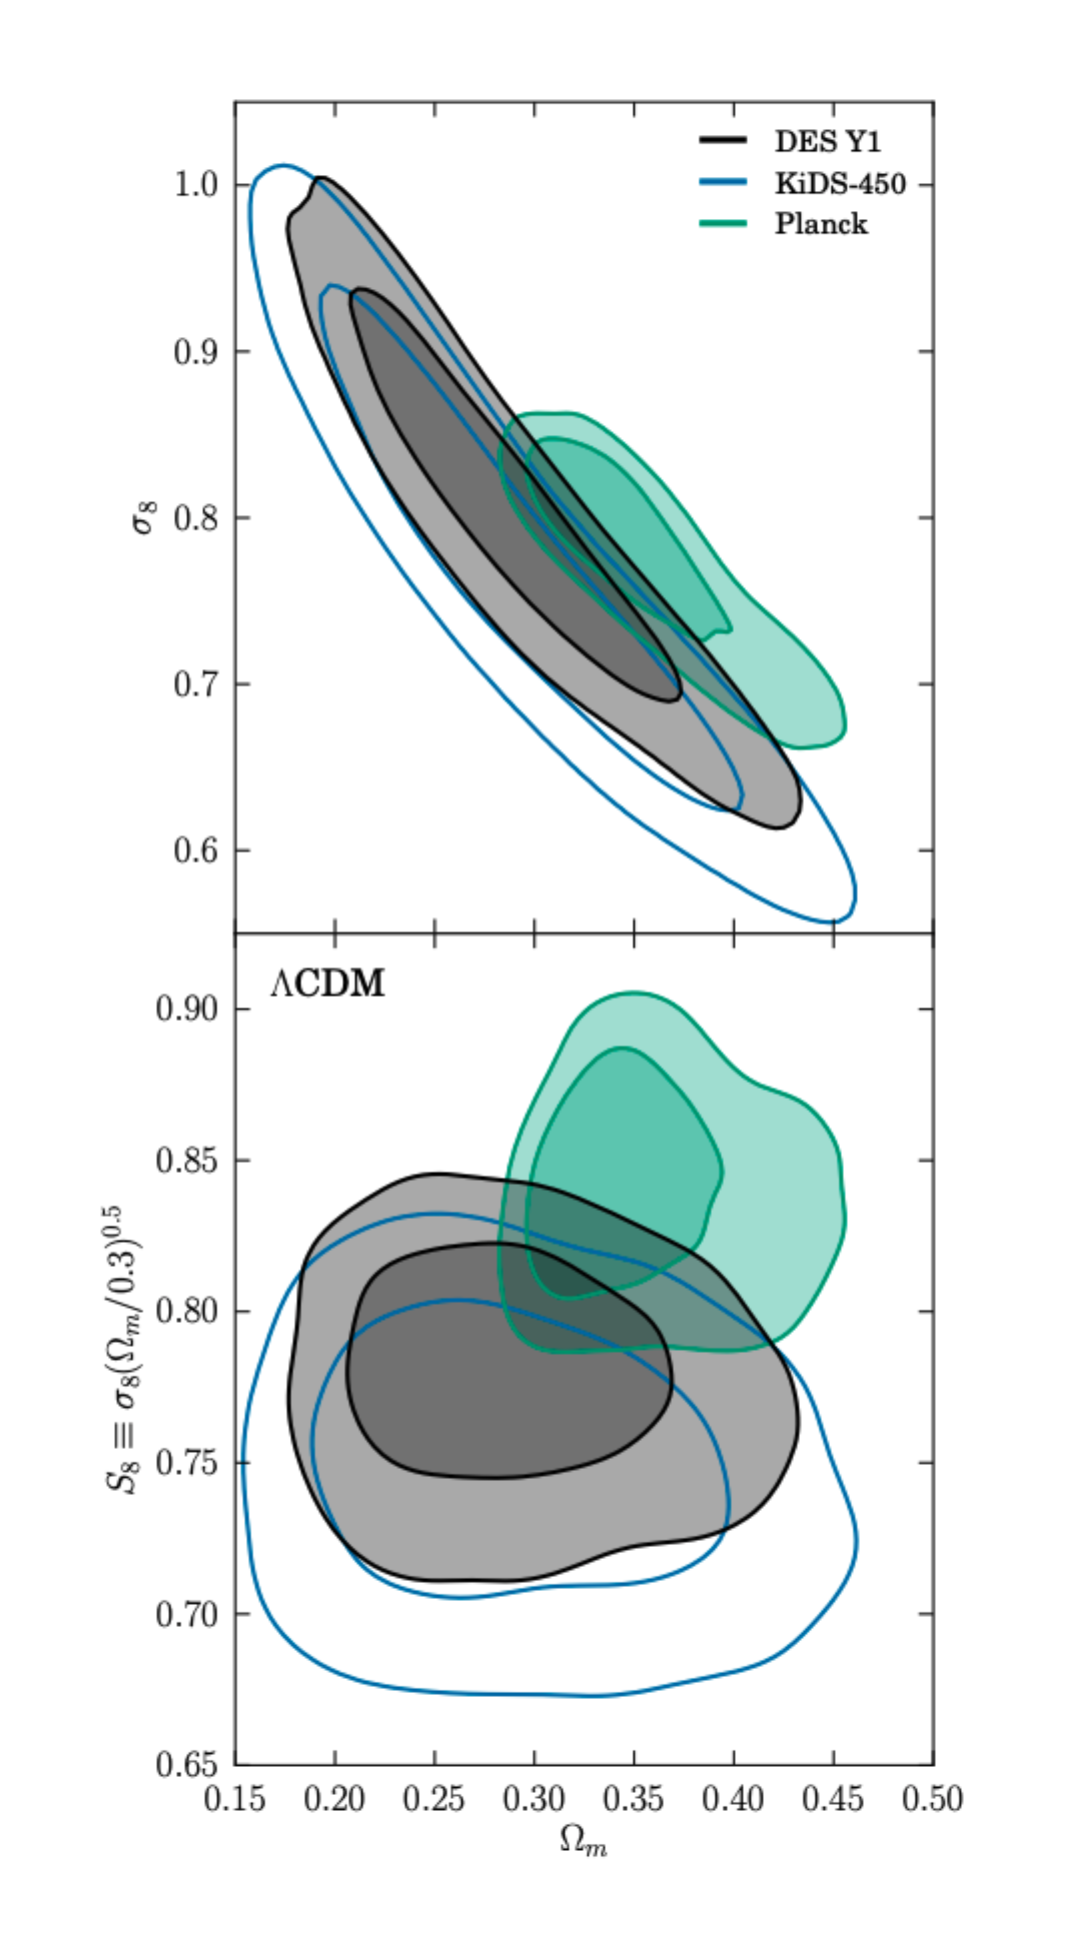

In [36]:
display(Image(cosmosis+"troxel/lcdm.png", width=500))

### $\Lambda$CDM Shear alone

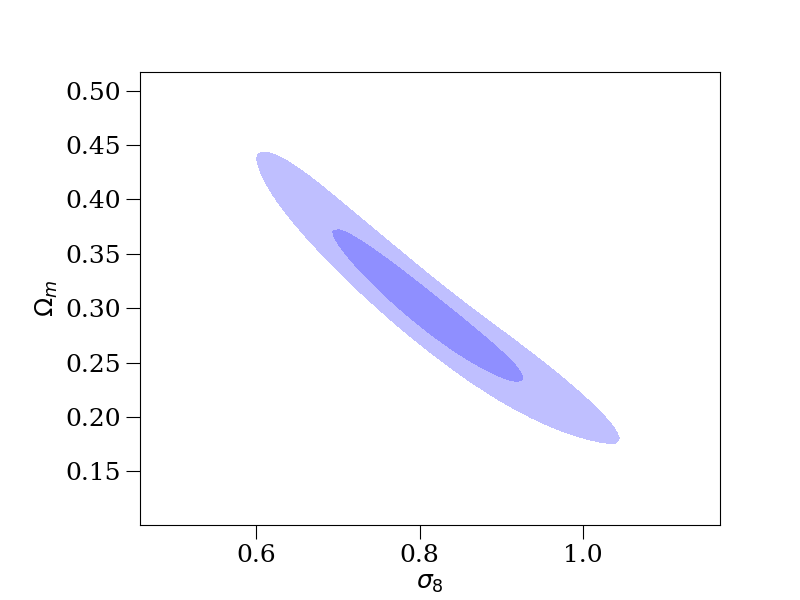

In [37]:
display(Image(lcdm_shear+"plots/shear_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
cosmological_parameters--omega_m        0.289098
cosmological_parameters--a_s        1.96841e-09
cosmological_parameters--h0        0.720954
supernova_params--m        -19.1183
cosmological_parameters--sigma_8        0.824837
prior        20.2558
like        3056.33
post        3076.59
weight        0.0017927
```

### $\Lambda$CDM SNe alone

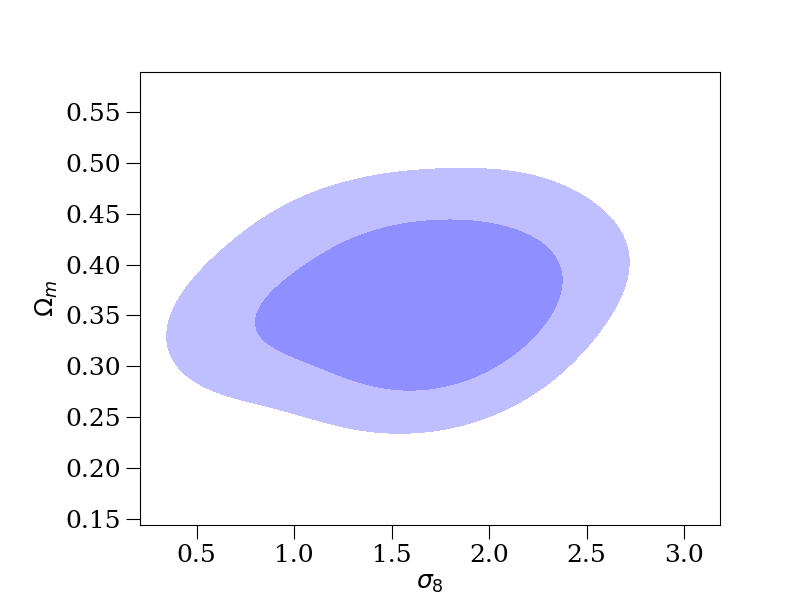

In [38]:
display(Image(lcdm_sne+"plots/sne_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.365846
cosmological_parameters--a_s        2.07644e-09
cosmological_parameters--h0        0.714648
supernova_params--m        -19.2638
cosmological_parameters--sigma_8        0.985223
prior        20.2558
like        -11.168
post        9.08773
weight        0.00181657

```

### $\Lambda$CDM Combined

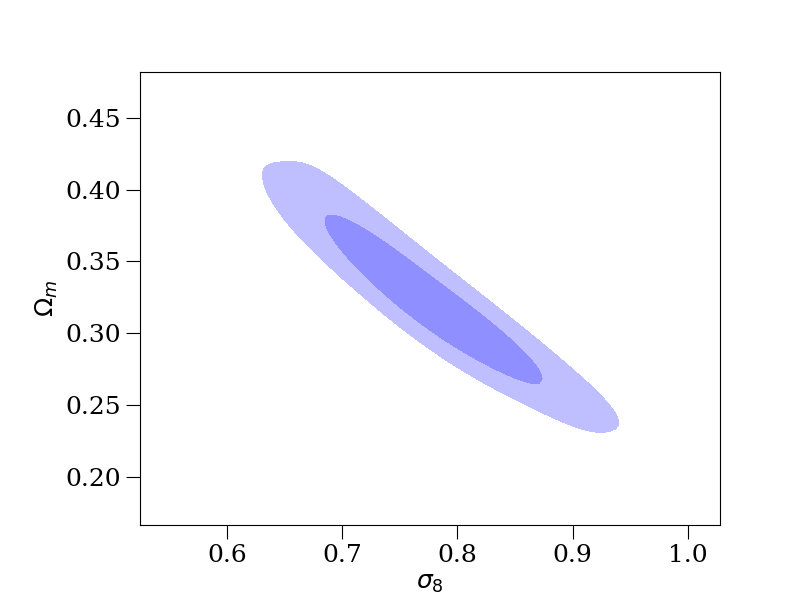

In [39]:
display(Image(lcdm_combined+"plots/combined_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.351276
cosmological_parameters--a_s        1.48929e-09
cosmological_parameters--h0        0.648521
supernova_params--m        -19.4839
cosmological_parameters--sigma_8        0.726014
prior        20.2558
like        3044.91
post        3065.17
weight        0.0018275
```

The shape of the combined likelihood plot is basically the same with Troxel et. al. 2016

## Likelihood: wCDM 

### $w$CDM Shear alone 

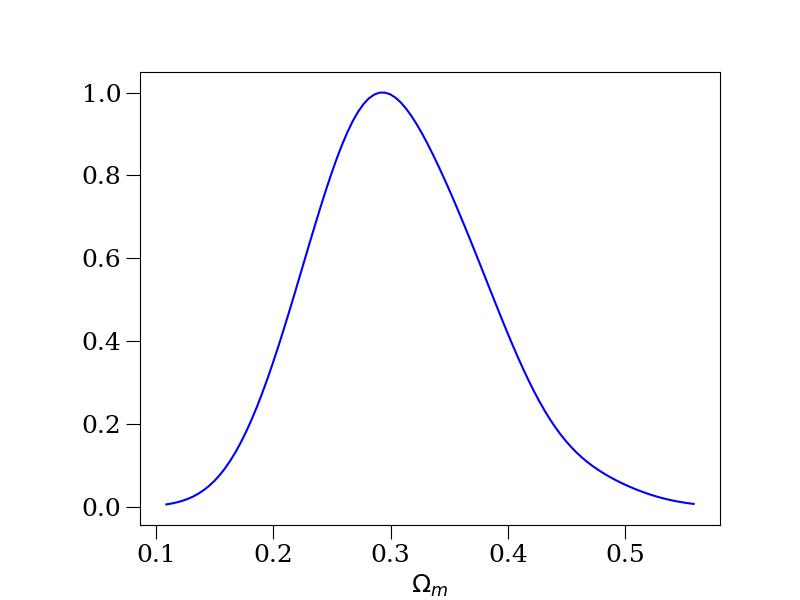

In [40]:
display(Image(wcdm_shear+"plots/w_shear_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.336367
cosmological_parameters--a_s        2.76878e-09
cosmological_parameters--h0        0.599884
cosmological_parameters--w        -0.668222
supernova_params--m        -19.0515
cosmological_parameters--sigma_8        0.776292
prior        20.0734
like        3056.33
post        3076.4
weight        0.0017927
```

### $w$CDM SNe alone

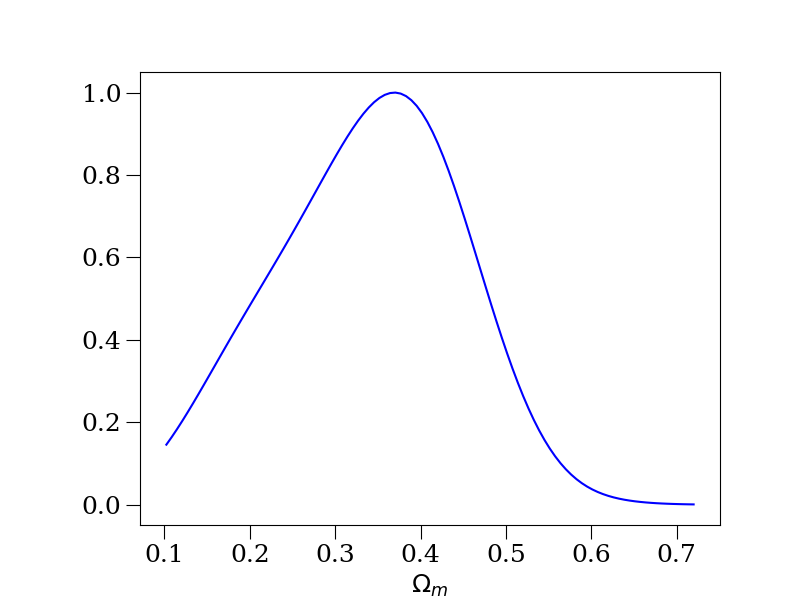

In [41]:
display(Image(wcdm_sne+"plots/w_sne_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.175026
cosmological_parameters--a_s        3.42483e-09
cosmological_parameters--h0        0.796836
cosmological_parameters--w        -0.627641
supernova_params--m        -19.0008
cosmological_parameters--sigma_8        0.61902
prior        20.0734
like        -11.0582
post        9.01528
weight        0.00180605
```

### $w$CDM Combined

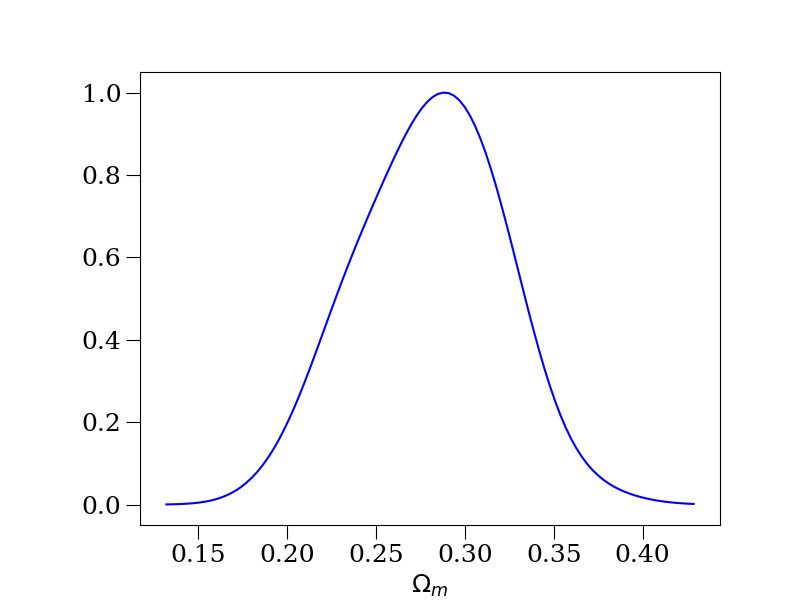

In [42]:
display(Image(wcdm_combined+"plots/w_combined_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.302266
cosmological_parameters--a_s        2.04072e-09
cosmological_parameters--h0        0.709651
cosmological_parameters--w        -0.864897
supernova_params--m        -19.2772
cosmological_parameters--sigma_8        0.818543
prior        20.0734
like        3045.19
post        3065.27
weight        0.00183127
```

In the wCDM case, the $\Omega_m$ from SNe is much smaller than that from shear and in $\Lambda$CDM. This might be caused only by the degeneracy between $w$ and $\Omega_m$

### $w$CDM Troxel et. al. 2016

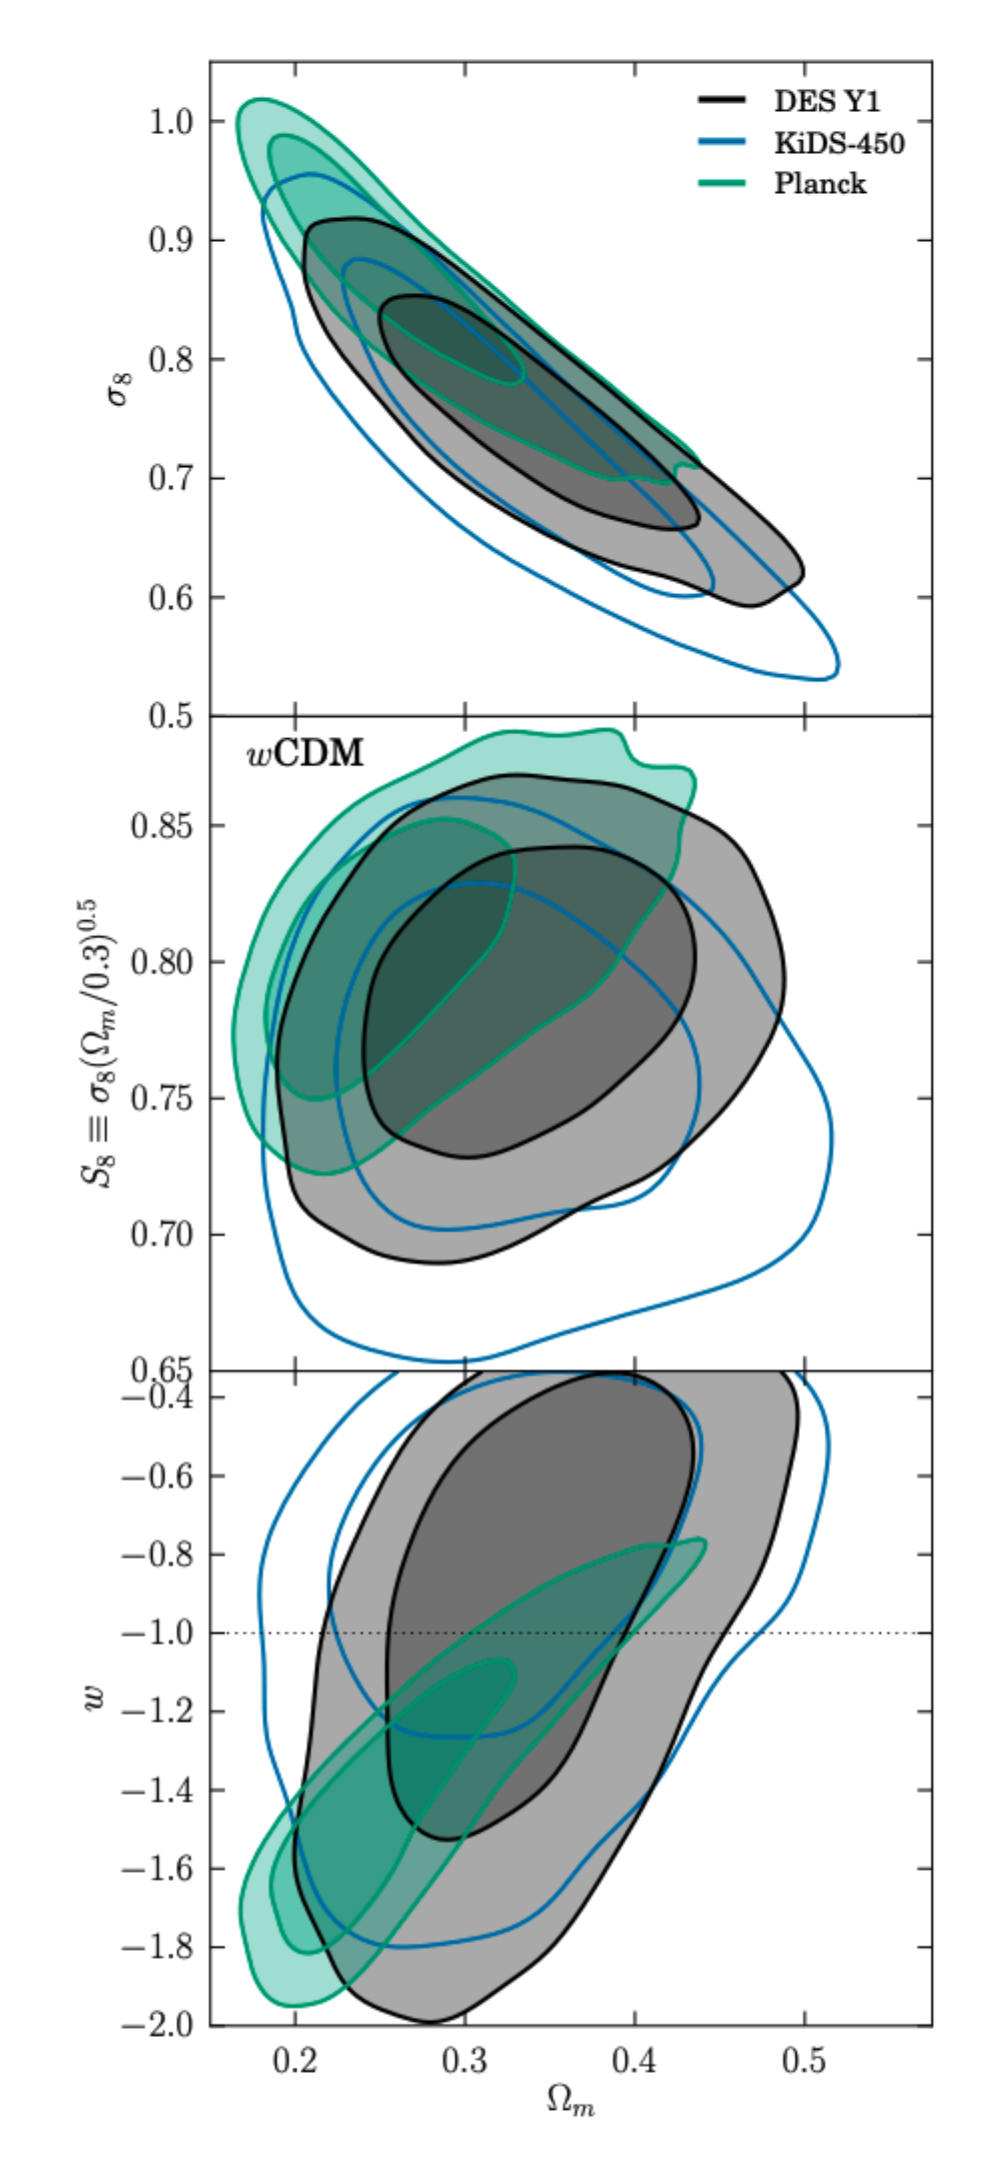

In [43]:
display(Image(cosmosis+"troxel/wcdm.png", width=500))

### $w$CDM Shear alone

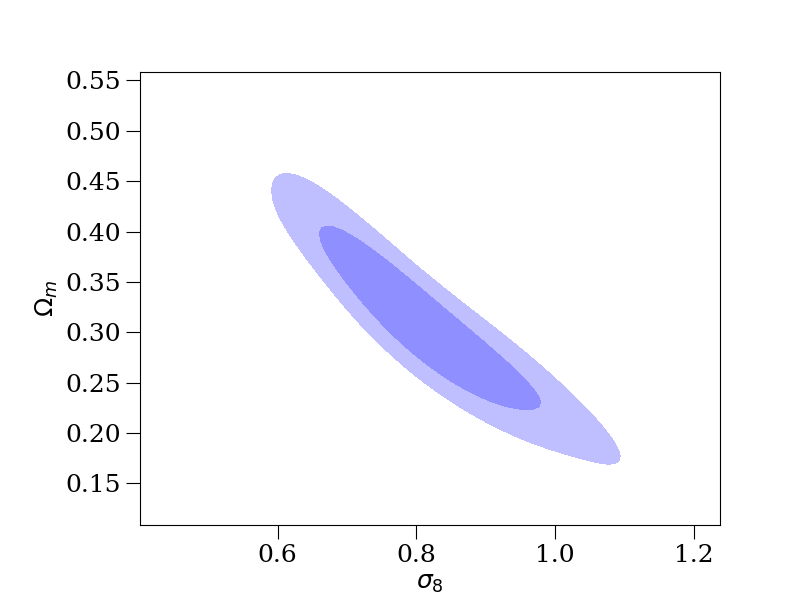

In [44]:
display(Image(wcdm_shear+"plots/w_shear_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.336367
cosmological_parameters--a_s        2.76878e-09
cosmological_parameters--h0        0.599884
cosmological_parameters--w        -0.668222
supernova_params--m        -19.0515
cosmological_parameters--sigma_8        0.776292
prior        20.0734
like        3056.33
post        3076.4
weight        0.0017927
```

### $w$CDM SNe alone

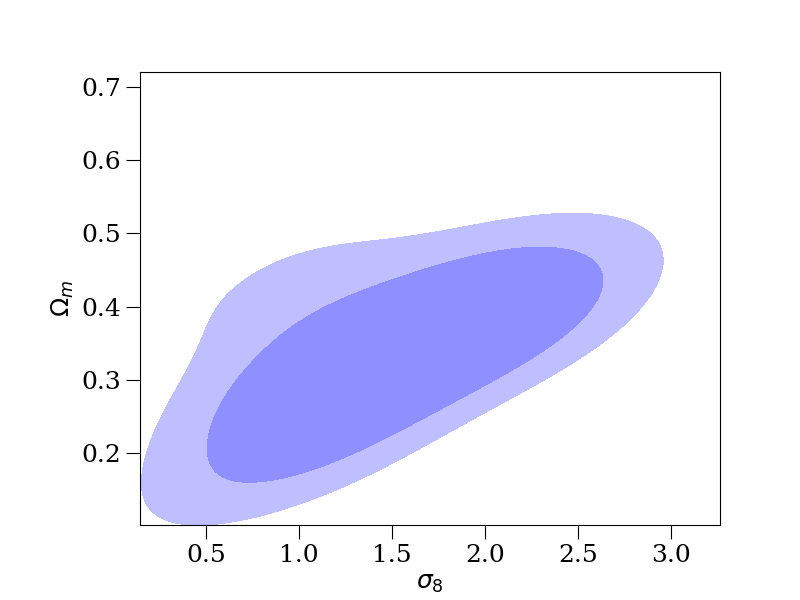

In [45]:
display(Image(wcdm_sne+"plots/w_sne_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.175026
cosmological_parameters--a_s        3.42483e-09
cosmological_parameters--h0        0.796836
cosmological_parameters--w        -0.627641
supernova_params--m        -19.0008
cosmological_parameters--sigma_8        0.61902
prior        20.0734
like        -11.0582
post        9.01528
weight        0.00180605
```

### $w$CDM Combined

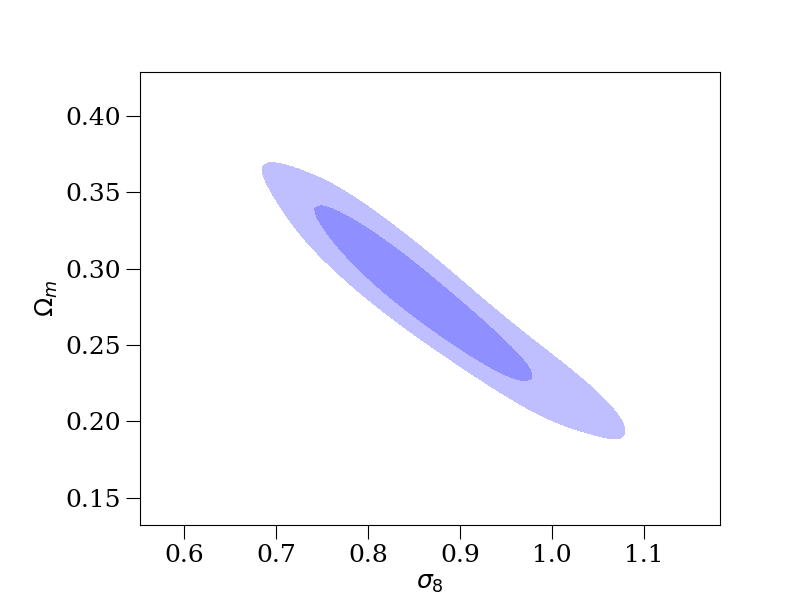

In [46]:
display(Image(wcdm_combined+"plots/w_combined_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.302266
cosmological_parameters--a_s        2.04072e-09
cosmological_parameters--h0        0.709651
cosmological_parameters--w        -0.864897
supernova_params--m        -19.2772
cosmological_parameters--sigma_8        0.818543
prior        20.0734
like        3045.19
post        3065.27
weight        0.00183127
```

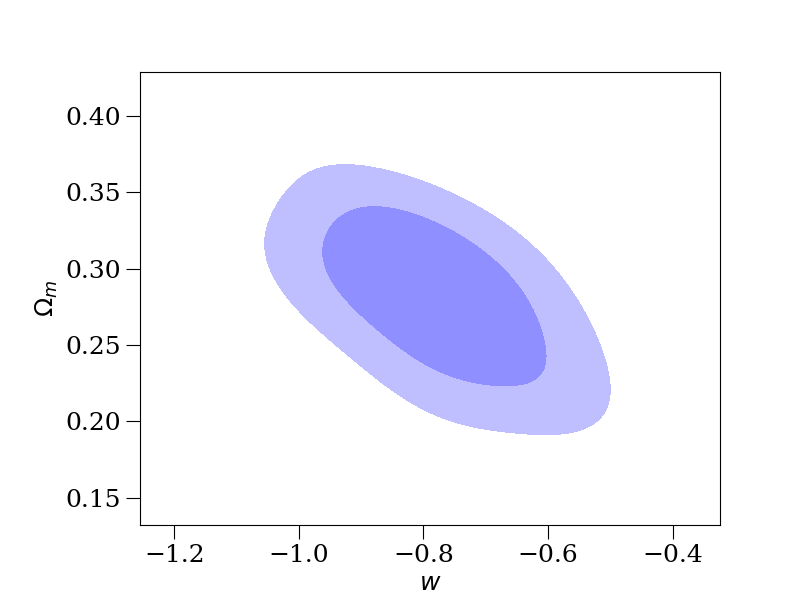

In [47]:
display(Image(wcdm_combined+"plots/w_combined_2D_cosmological_parameters--w_cosmological_parameters--omega_m.png",width=500))

As we can see in this plot, adding $w$ to the parameter space adds degeneracy in $\Omega_m$. However, in $\Lambda$CDM this degeneracy does not exist. That explains the differences we are getting in $\Omega_m$.

## Likelihood: Riess16

### Riess16 Shear alone 

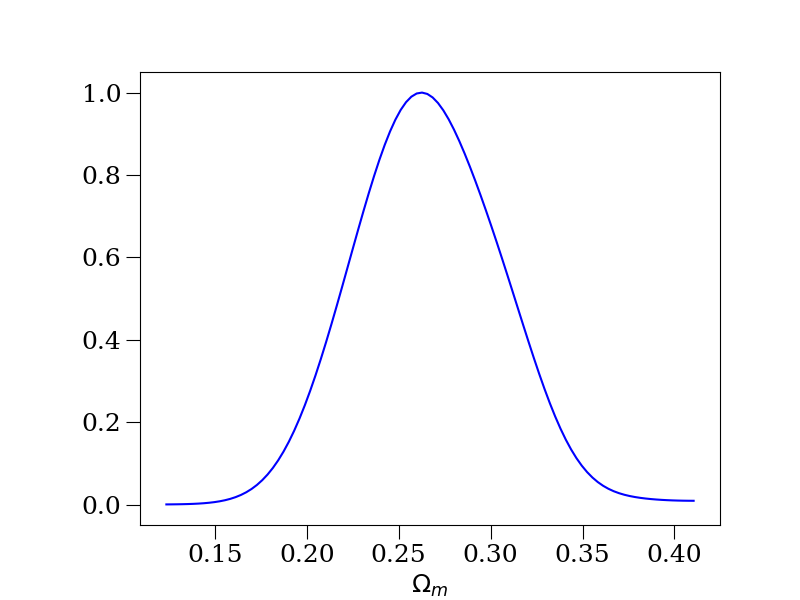

In [48]:
display(Image(lcdm_sn_shear+"plots/h_shear_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.289476
cosmological_parameters--a_s        1.90712e-09
cosmological_parameters--h0        0.72934
supernova_params--m        -19.1358
cosmological_parameters--sigma_8        0.824666
prior        20.2558
like        3056.31
post        3076.57
weight        0.00180455
```

### Riess16 SNe alone

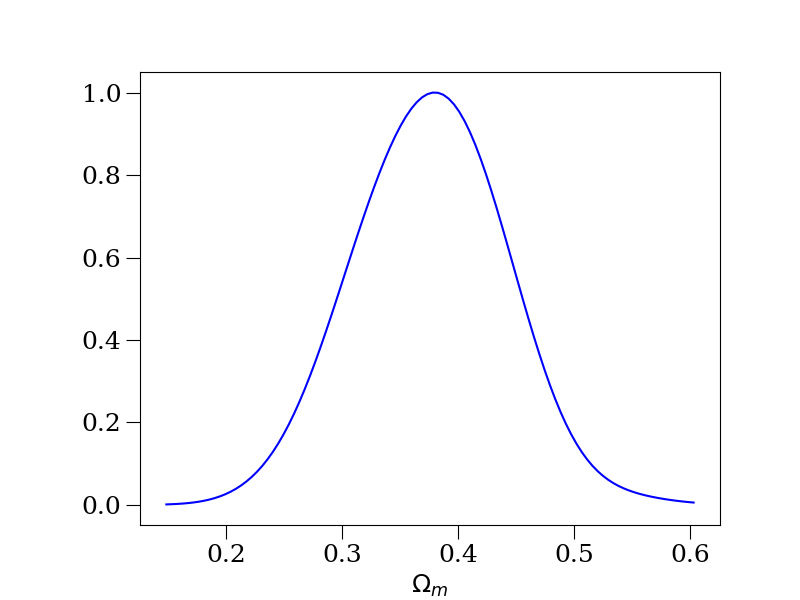

In [49]:
display(Image(lcdm_sn_sne+"plots/h_sne_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.368431
cosmological_parameters--a_s        3.20825e-09
cosmological_parameters--h0        0.785667
supernova_params--m        -19.0581
cosmological_parameters--sigma_8        1.36881
prior        20.2558
like        -11.174
post        9.08172
weight        0.00179252
```

### Riess16 Combined

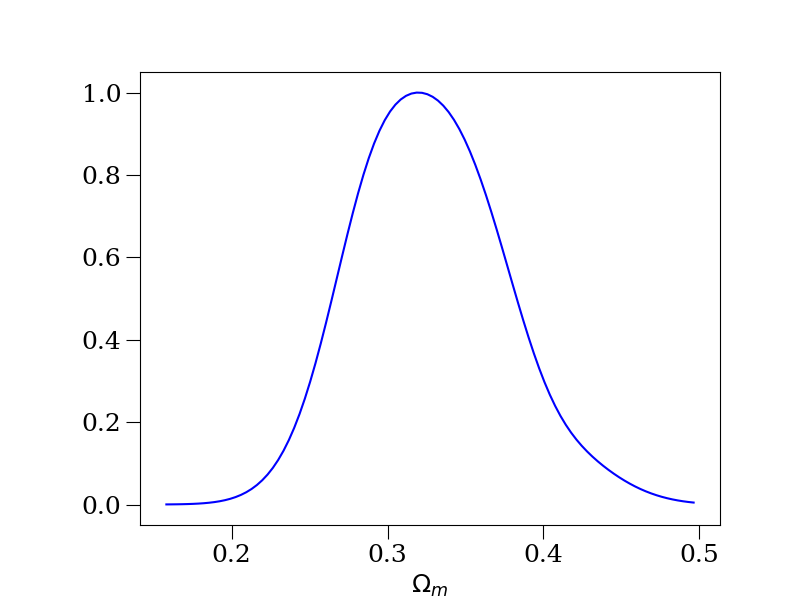

In [50]:
display(Image(lcdm_sn_combined+"plots/h_combined_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.334902
cosmological_parameters--a_s        1.30189e-09
cosmological_parameters--h0        0.728427
supernova_params--m        -19.2398
cosmological_parameters--sigma_8        0.751747
prior        20.2558
like        3044.59
post        3064.85
weight        0.00183739
```

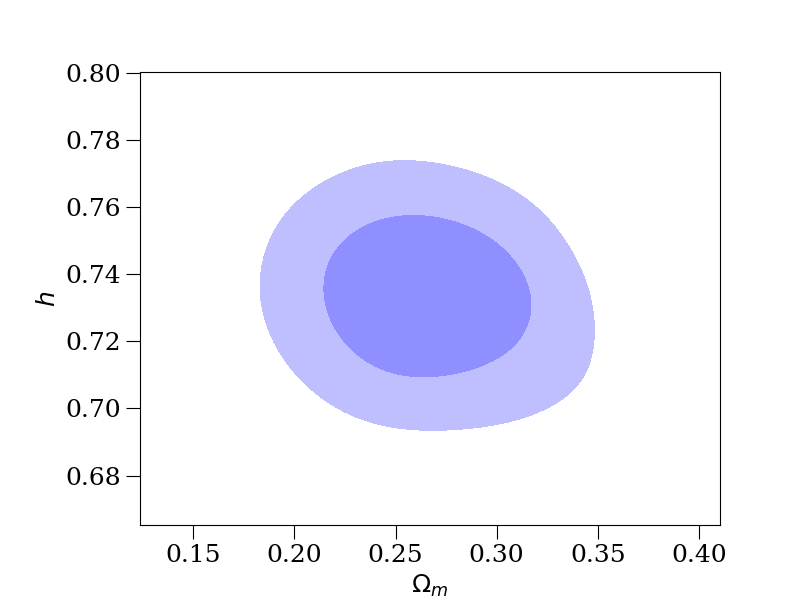

In [51]:
display(Image(lcdm_sn_shear+"plots/h_shear_2D_cosmological_parameters--omega_m_cosmological_parameters--h0.png",width=500))

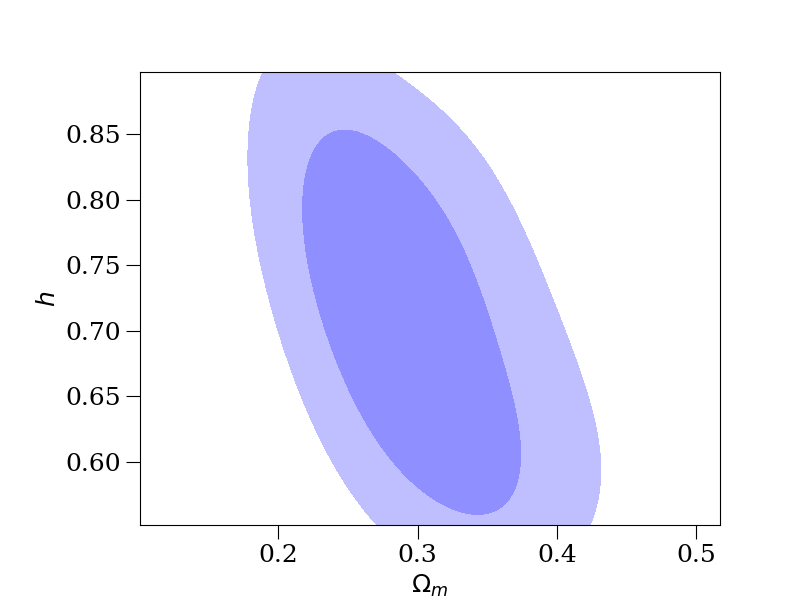

In [52]:
display(Image(lcdm_shear+"plots/shear_2D_cosmological_parameters--omega_m_cosmological_parameters--h0.png",width=500))

The $\Omega_m$ we get in this case is almost the same from that from $\Lambda$CDM, but the best fit for $H_0$ are very different. I suspect that the prior on $H_0$ might have little influence on our fitting of $\Omega_m$. 

## Likelihood: Planck 18

We fix $H_0$ at 67.32 km/s/Mpc

### Planck18 Shear alone 

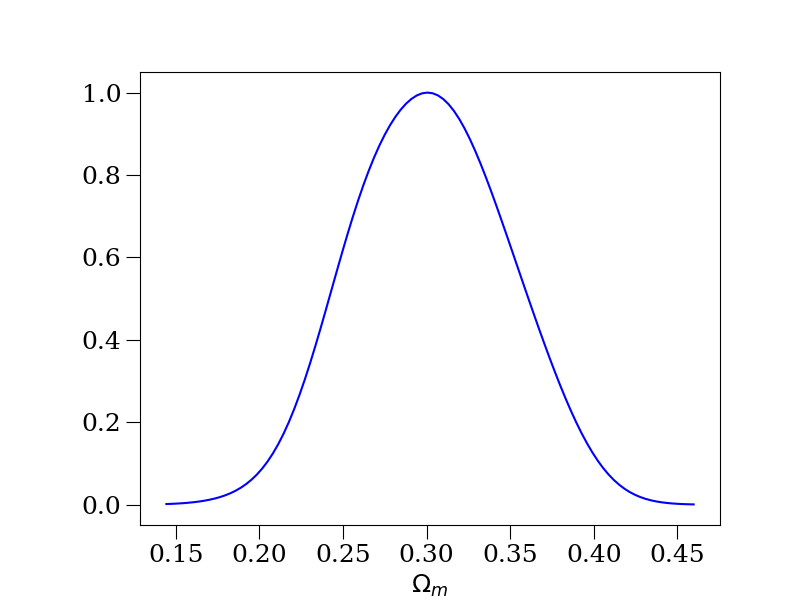

In [53]:
display(Image(lcdm_planck_shear+"plots/h0_shear_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.307717
cosmological_parameters--a_s        1.93437e-09
supernova_params--m        -19.071
cosmological_parameters--sigma_8        0.78752
prior        19.2059
like        3056.3
post        3075.51
weight        0.00179831
```

### Planck18 SNe alone

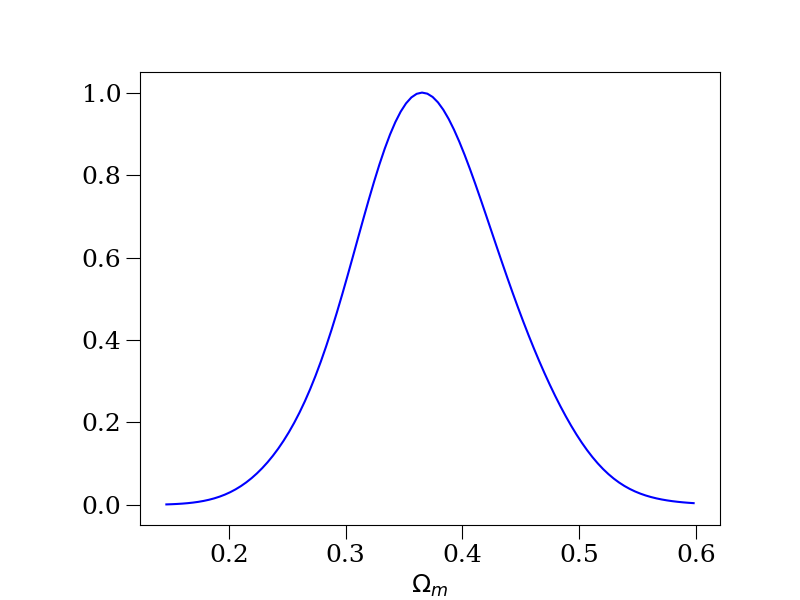

In [54]:
display(Image(lcdm_planck_sne+"plots/h0_sne_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.366747
cosmological_parameters--a_s        7.25974e-09
supernova_params--m        -19.3938
cosmological_parameters--sigma_8        1.71681
prior        19.2059
like        -11.1673
post        8.03864
weight        0.001796
```

### Planck18 Combined

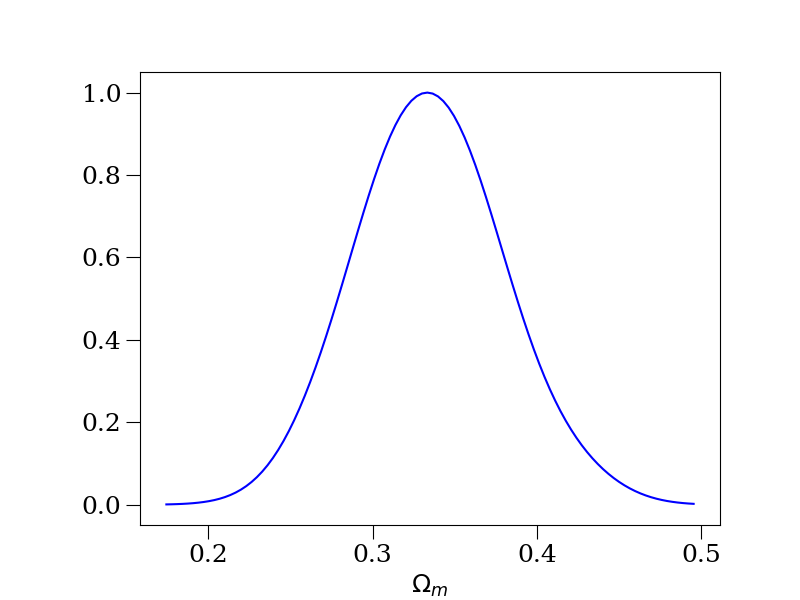

In [55]:
display(Image(lcdm_planck_combined+"plots/h0_combined_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.339787
cosmological_parameters--a_s        1.48864e-09
supernova_params--m        -19.4068
cosmological_parameters--sigma_8        0.737842
prior        19.2059
like        3044.85
post        3064.06
weight        0.00182022
```

In the combined and SNe analyses the posteriors of $\Omega_m$ are pretty close to each other. However, in the shear only part Riess16 is smaller than Planck18 and is closer to the value in Troxel et. al. 2016.

DES uses a flat prior from 55 to 90 so the $\Lambda$CDM simulation from the beginning is closest to the DES' analysis.

The $\chi^2$ we get for Riess16 are: 115,20,127. And the $\chi^2$ we get from Planck are 115,19,127. They are very close!

## Likelihood: closed universe

Let's run a simulation with $\Lambda_k$ set to be -0.1, i.e., the univese is closed. I used a flat prior for $H_0$ and $w$ is fixed

$
\frac{H^{2}}{H_{0}^{2}}=\Omega_{0, R} a^{-4}+\Omega_{0, M} a^{-3}+\Omega_{0, k} a^{-2}+\Omega_{0, \Lambda}
$

From Friedmann's equation, intuitively we should expect the posterior of $\Omega_m$ to be larger. 

### Shear alone 

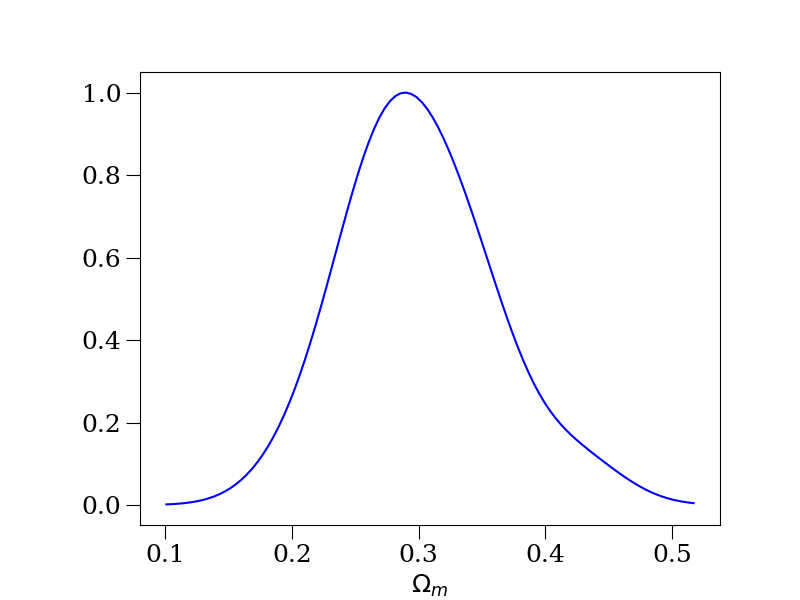

In [56]:
display(Image(closed_shear+"plots/shear_cosmological_parameters--omega_m.png",width=500))

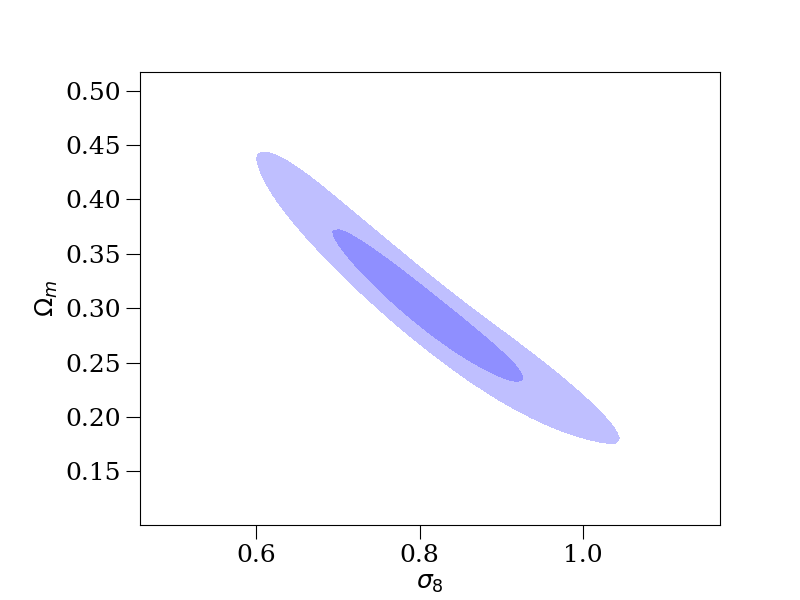

In [57]:
display(Image(closed_shear+"plots/shear_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.289098
cosmological_parameters--a_s        1.96841e-09
cosmological_parameters--h0        0.720954
supernova_params--m        -19.1183
cosmological_parameters--sigma_8        0.824837
prior        20.2558
like        3056.33
post        3076.59
weight        0.0017927
```

### SNe alone

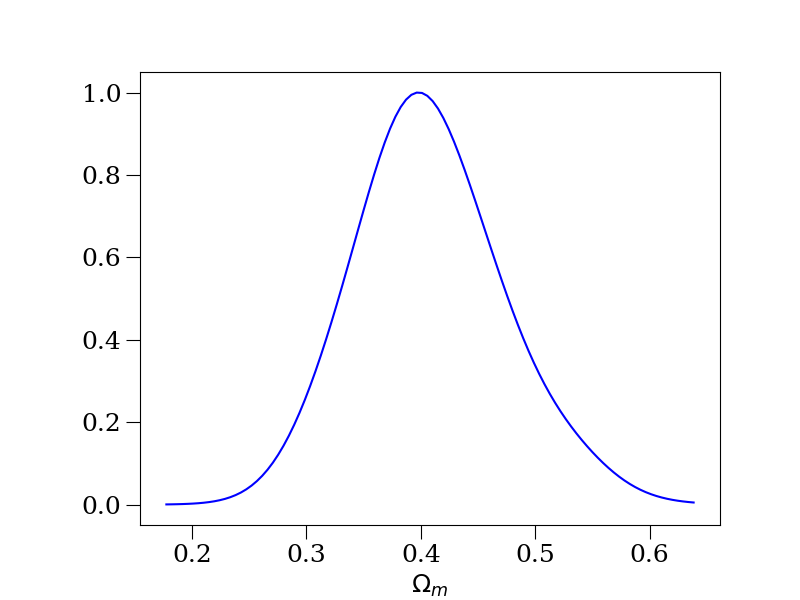

In [58]:
display(Image(closed_sne+"plots/sne_cosmological_parameters--omega_m.png",width=500))

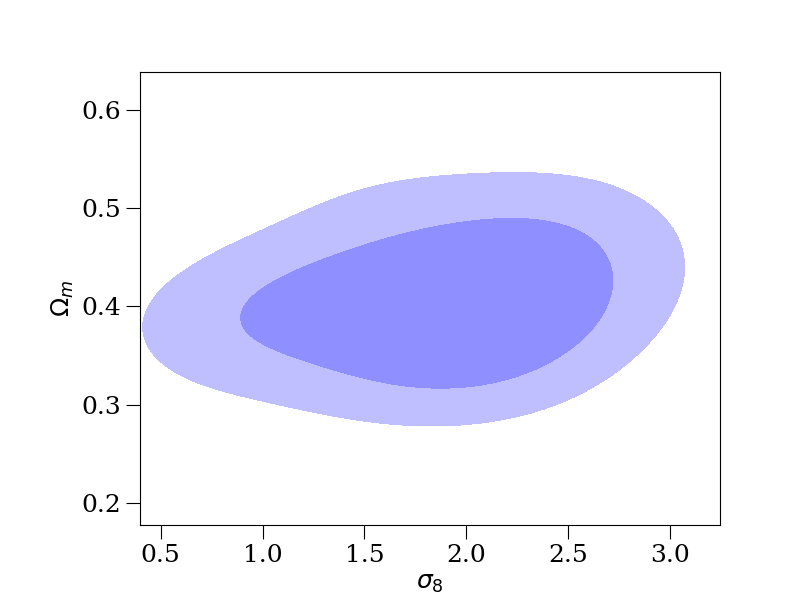

In [59]:
display(Image(closed_sne+"plots/sne_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))

```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.401906
cosmological_parameters--a_s        4.48127e-09
cosmological_parameters--h0        0.683005
supernova_params--m        -19.3701
cosmological_parameters--sigma_8        1.58187
prior        20.2558
like        -11.2316
post        9.02417
weight        0.00180275
```

### Combined

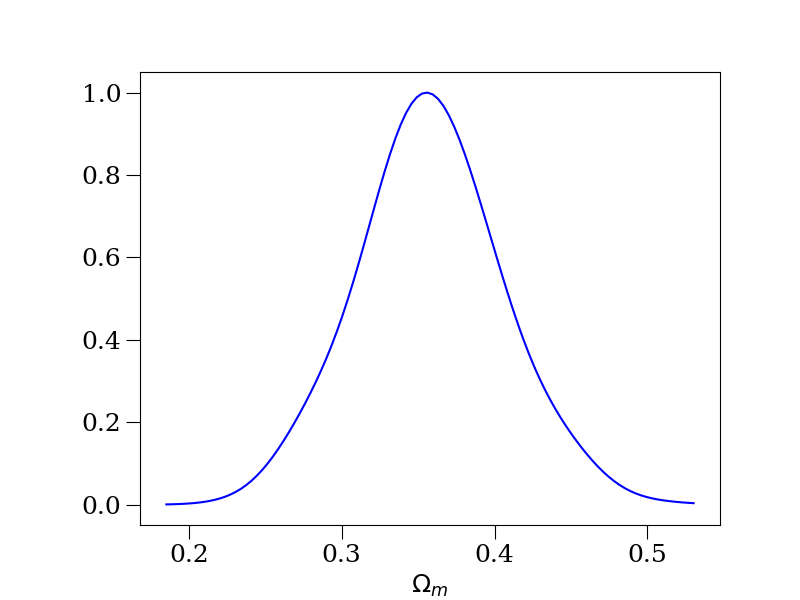

In [60]:
display(Image(closed_combined+"plots/combined_cosmological_parameters--omega_m.png",width=500))

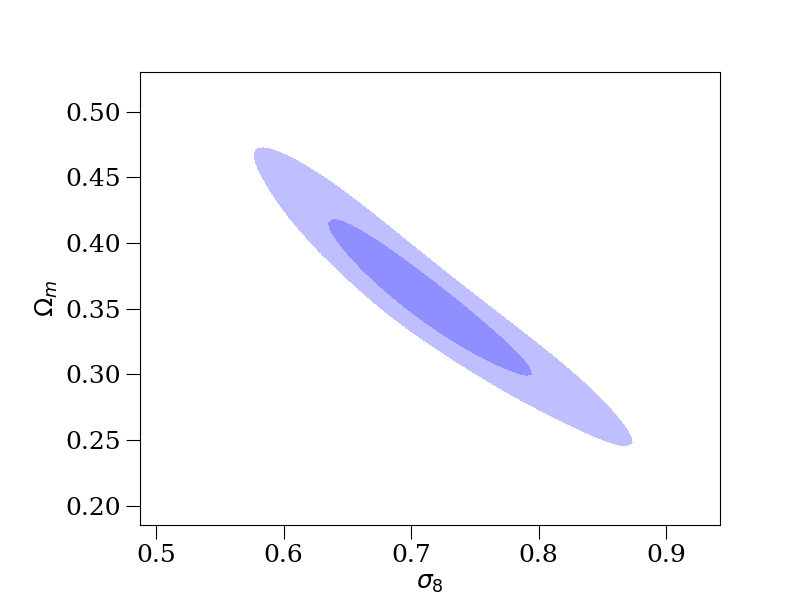

In [61]:
display(Image(closed_combined+"plots/combined_2D_cosmological_parameters--sigma_8_cosmological_parameters--omega_m.png",width=500))


```
#parameter value
#output.txt
cosmological_parameters--omega_m        0.374176
cosmological_parameters--a_s        9.91699e-10
cosmological_parameters--h0        0.661261
supernova_params--m        -19.4521
cosmological_parameters--sigma_8        0.68693
prior        20.2558
like        3044.27
post        3064.53
weight        0.0018157
```

The $\chi^2$ are respectively: `115,11,127` for shear only, sne only and combined. And $\Omega_m$ are 0.29,0.40,0.37. In SNe and combined $\Omega_m$ is larger than that in $\Lambda$CDM. As we predicted at the beginning. 

To see .ini files. Please visit /home/cz136/project/technical/cosmosis/ on the cosmology machine. Each folder whose name starting with `data` are used to run cosmoSIS. The meaning of the prefixes are:

`data_b` closed universe\
`data` $\Lambda$CDM\
`data_h0` Riess16\
`data_h` Planck\
`data_w`$w$CDM

All plots generated are in `\plots`.